In [ ]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('data.csv')

# 2. List column names
print("Dataset columns:")
print(df.columns.tolist())

# 3. Display the first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# 4. Basic information (data types, missing values)
print("\nDataset information:")
print(df.info())

Dataset columns:
['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro', 'power_kw', 'power_ps', 'transmission_type', 'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km', 'offer_description']

First 5 rows of the dataset:
   Unnamed: 0       brand              model  color registration_date  year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995   
2           2  alfa-romeo  Alfa Romeo Spider  black           02/1995  1995   
3           3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996   

  price_in_euro power_kw power_ps transmission_type fuel_type  \
0          1300      148      201            Manual    Petrol   
1         24900      191      260            Manual    Petrol   
2          5900      110      150           Un

In [ ]:
# List of columns to be removed
columns_to_drop = [
    'Unnamed: 0',
    'color',
    'registration_date',
    'fuel_consumption_l_100km',
    'fuel_consumption_g_km'
]

# Dropping the columns from the DataFrame
# axis=1 indicates we are dropping columns, not rows
df = df.drop(columns=columns_to_drop)

# Checking the new structure of the dataset
print("Remaining columns:", df.columns.tolist())
print(df.head())

Remaining columns: ['brand', 'model', 'year', 'price_in_euro', 'power_kw', 'power_ps', 'transmission_type', 'fuel_type', 'mileage_in_km', 'offer_description']
        brand              model  year price_in_euro power_kw power_ps  \
0  alfa-romeo     Alfa Romeo GTV  1995          1300      148      201   
1  alfa-romeo     Alfa Romeo 164  1995         24900      191      260   
2  alfa-romeo  Alfa Romeo Spider  1995          5900      110      150   
3  alfa-romeo  Alfa Romeo Spider  1995          4900      110      150   
4  alfa-romeo     Alfa Romeo 164  1996         17950      132      179   

  transmission_type fuel_type  mileage_in_km  \
0            Manual    Petrol       160500.0   
1            Manual    Petrol       190000.0   
2           Unknown    Petrol       129000.0   
3            Manual    Petrol       189500.0   
4            Manual    Petrol        96127.0   

                       offer_description  
0                              2.0 V6 TB  
1                    

In [ ]:
for i, leiras in enumerate(df['offer_description'].head(100)):
    print(f"{i}: {leiras}")

0: 2.0 V6 TB
1: Q4 Allrad, 3.2L GTA
2: ALFA ROME 916
3: 2.0 16V Twin Spark L
4: 3.0i Super V6, absoluter Topzustand !
5: 2.0 16V Twin Spark
6: Quadrifoglio
7: (3.0) V6 Super
8: |HU:neu|Klimaanlage|Youngtimer|
9: 2.0 T.Spark L *Klima *2.Hand *Zahnriemen
10: 3.0 V6 L
11: 2.0 spider
12: GTV 2.0 Twin Spark 16V
13: 3.0 V6 24v
14: 1.6l Twin Spark, Erstlack,sehr gepflegt
15: 2.0 V6 TB
16: 2.0 16V T.Spark L
17: GTV 3.0 V6 24V
18: 2.0 V6 TB - Leder - 2.Hand
19: Scuola Sportiva/Wertgutachten Note 2
20: 2.0 16V T.Spark 39.000km
21: 2.0 16V Twin Spark
22: 3,0  V6   12V
23: 3.0 V6 24V
24: 2.0 16V Twin Spark L  SPORTKIT  GTV  17" ALU
25: 2.0 16V Twin Spark
26: 1.8 Twin Spark
27: RZ Zagato Spider | NR.172 | SAMMLER | IL MOSTRO
28: 2.0 T.Spark/LEDER/
29: 3.0 V6 Leder Beige Klima Alu ZR+ÖL+TÜVNEU
30: 2.0 T.Spark L
31: 2.0 Twin Spark
32: 1.8 Twin Spark
33: 1.8 T.Spark CABRIO
34: 1,816V Twin Spark APRIL 2025
35: Spider 2.0 Twin Spark
36: 146 1.4 Twin Spark L
37: 2.5 V6 24V ARESE / wenig KM / TÜV
38: 2.0 

In [ ]:
# Extracting the engine capacity using a Regular Expression (Regex)
# r'(\d\.\d)' : looks for a digit, followed by a dot, followed by another digit (e.g., 1.6)
df['engine_capacity'] = df['offer_description'].str.extract(r'(\d\.\d)')

# Iterating through the first 100 rows of the 'offer_description' column
# 'enumerate' provides both the index (i) and the content (leiras) for each row
for i, leiras in enumerate(df['offer_description'].head(100)):
    # Printing the row index and the description using an f-string for clear inspection
    print(f"{i}: {leiras}")

0: 2.0 V6 TB
1: Q4 Allrad, 3.2L GTA
2: ALFA ROME 916
3: 2.0 16V Twin Spark L
4: 3.0i Super V6, absoluter Topzustand !
5: 2.0 16V Twin Spark
6: Quadrifoglio
7: (3.0) V6 Super
8: |HU:neu|Klimaanlage|Youngtimer|
9: 2.0 T.Spark L *Klima *2.Hand *Zahnriemen
10: 3.0 V6 L
11: 2.0 spider
12: GTV 2.0 Twin Spark 16V
13: 3.0 V6 24v
14: 1.6l Twin Spark, Erstlack,sehr gepflegt
15: 2.0 V6 TB
16: 2.0 16V T.Spark L
17: GTV 3.0 V6 24V
18: 2.0 V6 TB - Leder - 2.Hand
19: Scuola Sportiva/Wertgutachten Note 2
20: 2.0 16V T.Spark 39.000km
21: 2.0 16V Twin Spark
22: 3,0  V6   12V
23: 3.0 V6 24V
24: 2.0 16V Twin Spark L  SPORTKIT  GTV  17" ALU
25: 2.0 16V Twin Spark
26: 1.8 Twin Spark
27: RZ Zagato Spider | NR.172 | SAMMLER | IL MOSTRO
28: 2.0 T.Spark/LEDER/
29: 3.0 V6 Leder Beige Klima Alu ZR+ÖL+TÜVNEU
30: 2.0 T.Spark L
31: 2.0 Twin Spark
32: 1.8 Twin Spark
33: 1.8 T.Spark CABRIO
34: 1,816V Twin Spark APRIL 2025
35: Spider 2.0 Twin Spark
36: 146 1.4 Twin Spark L
37: 2.5 V6 24V ARESE / wenig KM / TÜV
38: 2.0 

In [ ]:
import re

# Extracting the valve information (e.g., 12V, 16V, 24V)
# We look for one or more digits followed immediately by 'V'
df['valves'] = df['offer_description'].str.extract(r'(\d+[Vv])')

# Normalizing to uppercase (e.g., '16v' becomes '16V')
df['valves'] = df['valves'].str.upper()

# Displaying the first 100 rows to verify
print(df[['offer_description', 'valves']].head(100))

                          offer_description valves
0                                 2.0 V6 TB    NaN
1                       Q4 Allrad, 3.2L GTA    NaN
2                             ALFA ROME 916    NaN
3                      2.0 16V Twin Spark L    16V
4     3.0i Super V6, absoluter Topzustand !    NaN
..                                      ...    ...
95     2.0 Twin Spark Selespeed Distinctive    NaN
96              1.6 T.Spark ECO Progression    NaN
97                   156 Sportwagon 2.4 JTD    NaN
98              3.2 V6 24V GTA Sammlerstück    24V
99  2.0 16V Automatik/Klima/Schiebedach/Alu    16V

[100 rows x 2 columns]


In [ ]:
# Counting occurrences of each valve type
# dropna=False is used to see how many rows have no valve information
valve_counts = df['valves'].value_counts(dropna=False)

# Displaying the statistical distribution
print("Valve count distribution:")
print(valve_counts)

# Calculating the percentage of missing data
missing_percentage = (df['valves'].isna().sum() / len(df)) * 100
print(f"\nMissing valve data: {missing_percentage:.2f}%")

Valve count distribution:
valves
NaN     246977
16V       2091
8V         797
48V        752
12V        228
5V          45
24V         38
20V         38
1V          20
3V          18
230V        16
2V          15
0V          15
360V         5
7V           3
6V           3
4V           3
185V         2
10V          2
28V          2
32V          2
816V         1
9V           1
30V          1
616V         1
290V         1
100V         1
220V         1
Name: count, dtype: int64

Missing valve data: 98.37%


In [ ]:
# Dropping the 'valves' column as it has >98% missing values and contains noise
df = df.drop(columns=['valves'])

# Verify that the column is gone
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['brand', 'model', 'year', 'price_in_euro', 'power_kw', 'power_ps', 'transmission_type', 'fuel_type', 'mileage_in_km', 'offer_description', 'engine_capacity']


In [ ]:
# Extracting engine capacity (e.g., 2.0, 3,0, 1.6L)
# (\d+[\.,]\d+) -> Matches one or more digits, a dot or comma, then more digits
# (?:[Ll])? -> Matches the letter 'L' (litres) if present, but doesn't include it in the result
df['engine_capacity'] = df['offer_description'].str.extract(r'(\d+[\.,]\d+)(?:[Ll])?')

# Standardizing: replacing commas with dots and converting to float
df['engine_capacity'] = df['engine_capacity'].str.replace(',', '.').astype(float)

# Verifying the first 100 rows
print(df[['offer_description', 'engine_capacity', ]].head(100))

                          offer_description  engine_capacity
0                                 2.0 V6 TB              2.0
1                       Q4 Allrad, 3.2L GTA              3.2
2                             ALFA ROME 916              NaN
3                      2.0 16V Twin Spark L              2.0
4     3.0i Super V6, absoluter Topzustand !              3.0
..                                      ...              ...
95     2.0 Twin Spark Selespeed Distinctive              2.0
96              1.6 T.Spark ECO Progression              1.6
97                   156 Sportwagon 2.4 JTD              2.4
98              3.2 V6 24V GTA Sammlerstück              3.2
99  2.0 16V Automatik/Klima/Schiebedach/Alu              2.0

[100 rows x 2 columns]


In [ ]:
# dropna=False shows how many rows are missing this data
engine_counts = df['engine_capacity'].value_counts(dropna=False).head(20)

# Calculating the percentage of missing data for engine capacity
missing_engine_pct = (df['engine_capacity'].isna().sum() / len(df)) * 100

print("Top 20 Engine Capacities found:")
print(engine_counts)
print(f"\nMissing engine capacity data: {missing_engine_pct:.2f}%")

# Quick check on the extracted values vs descriptions
print("\nSample check (first 20 rows):")
print(df[['offer_description', 'engine_capacity']].head(20))

Top 20 Engine Capacities found:
engine_capacity
NaN    134605
2.0     27642
1.0     15794
1.5     13290
1.6     12241
1.4     11614
1.2     11571
3.0      4986
1.8      3357
1.3      2108
2.5      1710
2.2      1704
1.9      1105
1.7       679
4.0       513
5.0       475
2.7       441
2.4       440
2.3       420
0.9       397
Name: count, dtype: int64

Missing engine capacity data: 53.61%

Sample check (first 20 rows):
                           offer_description  engine_capacity
0                                  2.0 V6 TB              2.0
1                        Q4 Allrad, 3.2L GTA              3.2
2                              ALFA ROME 916              NaN
3                       2.0 16V Twin Spark L              2.0
4      3.0i Super V6, absoluter Topzustand !              3.0
5                         2.0 16V Twin Spark              2.0
6                               Quadrifoglio              NaN
7                             (3.0) V6 Super              3.0
8            |HU:ne

In [ ]:
# Checking how many rows are missing both engine capacity AND power
# This helps decide if we should drop these rows entirely
missing_both = df[df['engine_capacity'].isna() & df['power_kw'].isna()]
print(f"Cars with zero technical data: {len(missing_both)}")

Cars with zero technical data: 83


In [ ]:
# Dropping rows where both engine capacity and power are missing
# These 83 rows offer no technical value for price prediction
df = df.dropna(subset=['engine_capacity', 'power_kw'], how='all')

# Final check of the remaining dataset size
# Verifying the number of rows after the drop
print(f"Remaining rows: {len(df)}")

Remaining rows: 250996


In [ ]:
# Extracting the cylinder configuration as raw text
# [Vv]\d+ -> Matches 'V' or 'v' followed by one or more digits
df['cylinders_raw'] = df['offer_description'].str.extract(r'([Vv]\d+)')

# Let's see if we found ANY rows containing 'V' followed by a number
# We filter the dataframe to show only rows where cylinders_raw is NOT null
found_cylinders = df[df['cylinders_raw'].notna()]

print(f"Number of rows where cylinders were found: {len(found_cylinders)}")
print("\nFirst 20 findings:")
print(found_cylinders[['offer_description', 'cylinders_raw']].head(20))

# Distribution of the raw strings
print("\nRaw cylinder distribution:")
print(df['cylinders_raw'].value_counts())

Number of rows where cylinders were found: 4227

First 20 findings:
                                  offer_description cylinders_raw
0                                         2.0 V6 TB            V6
4             3.0i Super V6, absoluter Topzustand !            V6
7                                    (3.0) V6 Super            V6
10                                         3.0 V6 L            V6
13                                       3.0 V6 24v            V6
15                                        2.0 V6 TB            V6
17                                   GTV 3.0 V6 24V            V6
18                       2.0 V6 TB - Leder - 2.Hand            V6
22                                    3,0  V6   12V            V6
23                                       3.0 V6 24V            V6
29        3.0 V6 Leder Beige Klima Alu ZR+ÖL+TÜVNEU            V6
37                2.5 V6 24V ARESE / wenig KM / TÜV            V6
45                                 GTV 3.0 V6 24V L            V6
58      

In [ ]:
# List of columns that are no longer needed after feature extraction
columns_to_final_drop = ['cylinders_raw', 'offer_description']

# Adding 'cylinders' to the drop list if it exists in the dataframe
if 'cylinders' in df.columns:
    columns_to_final_drop.append('cylinders')

# Dropping the columns to clean up the memory and the feature space
df = df.drop(columns=columns_to_final_drop)

# Final check of the remaining columns and data types
print("Final columns for the new Pipeline:")
print(df.columns.tolist())
print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())

Final columns for the new Pipeline:
['brand', 'model', 'year', 'price_in_euro', 'power_kw', 'power_ps', 'transmission_type', 'fuel_type', 'mileage_in_km', 'engine_capacity']

First 5 rows of the cleaned dataset:
        brand              model  year price_in_euro power_kw power_ps  \
0  alfa-romeo     Alfa Romeo GTV  1995          1300      148      201   
1  alfa-romeo     Alfa Romeo 164  1995         24900      191      260   
2  alfa-romeo  Alfa Romeo Spider  1995          5900      110      150   
3  alfa-romeo  Alfa Romeo Spider  1995          4900      110      150   
4  alfa-romeo     Alfa Romeo 164  1996         17950      132      179   

  transmission_type fuel_type  mileage_in_km  engine_capacity  
0            Manual    Petrol       160500.0              2.0  
1            Manual    Petrol       190000.0              3.2  
2           Unknown    Petrol       129000.0              NaN  
3            Manual    Petrol       189500.0              2.0  
4            Manual    

In [ ]:
# Checking the data types (Dtypes) and memory usage of the final columns
# This is crucial for selecting the right Pipeline transformers (e.g., OneHotEncoder vs StandardScaler)
print(df.info())

# Counting the number of unique categories in each 'object' column
# High cardinality (too many unique values) in 'model' can be a challenge
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

<class 'pandas.core.frame.DataFrame'>
Index: 250996 entries, 0 to 251078
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              250996 non-null  object 
 1   model              250996 non-null  object 
 2   year               250996 non-null  object 
 3   price_in_euro      250996 non-null  object 
 4   power_kw           250945 non-null  object 
 5   power_ps           250947 non-null  object 
 6   transmission_type  250996 non-null  object 
 7   fuel_type          250996 non-null  object 
 8   mileage_in_km      250846 non-null  float64
 9   engine_capacity    116474 non-null  float64
dtypes: float64(2), object(8)
memory usage: 21.1+ MB
None
Unique values in brand: 47
Unique values in model: 1311
Unique values in year: 90
Unique values in price_in_euro: 18217
Unique values in power_kw: 596
Unique values in power_ps: 578
Unique values in transmission_type: 4
Unique values in fuel_type: 

In [ ]:
# Checking the unique values in the 'year' column to spot anomalies
# We sort them to easily see if there are strings or weird dates
unique_years = sorted(df['year'].unique().astype(str))
print("Unique values in 'year' column (first 20 and last 20):")
print(unique_years[:20])
print(unique_years[-20:])

# Checking if there are any non-digit values in the column
# This finds rows where 'year' contains something other than 0-9
non_numeric_years = df[~df['year'].astype(str).str.isdigit()]
print(f"\nNumber of rows with non-numeric years: {len(non_numeric_years)}")
if len(non_numeric_years) > 0:
    print("Sample of non-numeric years found:")
    print(non_numeric_years['year'].unique())

Unique values in 'year' column (first 20 and last 20):
[np.str_('01/2019'), np.str_('01/2023'), np.str_('02/2020'), np.str_('02/2023'), np.str_('03/2007'), np.str_('03/2015'), np.str_('03/2019'), np.str_('03/2023'), np.str_('04/2006'), np.str_('04/2013'), np.str_('04/2017'), np.str_('04/2023'), np.str_('05/2015'), np.str_('05/2016'), np.str_('05/2017'), np.str_('05/2021'), np.str_('05/2023'), np.str_('06/2016'), np.str_('06/2018'), np.str_('06/2021')]
[np.str_('243.431 km'), np.str_('27449'), np.str_('280.000 km'), np.str_('32.250 km'), np.str_('33.150 km'), np.str_('3700'), np.str_('39.900 km'), np.str_('49.000 km'), np.str_('6.500 km'), np.str_('64.500 km'), np.str_('75.700 km'), np.str_('8.000 km'), np.str_('80.000 km'), np.str_('Automatic'), np.str_('CNG'), np.str_('Diesel'), np.str_('Hybrid'), np.str_('LPG'), np.str_('Manual'), np.str_('Petrol')]

Number of rows with non-numeric years: 192
Sample of non-numeric years found:
['Petrol' 'Automatic' 'Manual' 'Diesel' '04/2017' '12/200

In [ ]:
# Function to extract only the 4-digit year from any string
def extract_year(value):
    # Search for exactly 4 digits in a row (e.g., 2017)
    match = re.search(r'(\d{4})', str(value))
    if match:
        return int(match.group(1))
    return None

# 1. Extract the year and convert to numeric
df['year'] = df['year'].apply(extract_year)

# 2. Drop rows where the year is still missing (those 192 messy rows)
df = df.dropna(subset=['year'])

# 3. Convert year to integer (it's cleaner than float)
df['year'] = df['year'].astype(int)

# Final check: see the range of years
print(f"Year range: {df['year'].min()} - {df['year'].max()}")
print(f"Remaining rows: {len(df)}")

Year range: 1090 - 3700
Remaining rows: 250848


In [ ]:
# Filtering the dataframe to keep only realistic car production years
# We assume cars were produced between 1900 and 2026
df = df[(df['year'] >= 1900) & (df['year'] <= 2026)]

# Final check of the year range after filtering
print(f"Corrected Year range: {df['year'].min()} - {df['year'].max()}")
print(f"Remaining rows: {len(df)}")

# Let's see the oldest and newest cars to be sure
print("\nSample of the oldest cars in the dataset:")
print(df.sort_values('year').head(5))

Corrected Year range: 1995 - 2023
Remaining rows: 250844

Sample of the oldest cars in the dataset:
                brand                model  year price_in_euro power_kw  \
51992         ferrari          Ferrari 348  1995         89900      235   
57620            ford          Ford Escort  1995           999       77   
57619            ford           Ford Probe  1995          1800       85   
0          alfa-romeo       Alfa Romeo GTV  1995          1300      148   
102081  mercedes-benz  Mercedes-Benz C 180  1995          3500       90   

       power_ps transmission_type fuel_type  mileage_in_km  engine_capacity  
51992       320            Manual    Petrol        54000.0              NaN  
57620       105            Manual    Petrol       159436.0              NaN  
57619       116            Manual    Petrol       178000.0              NaN  
0           201            Manual    Petrol       160500.0              2.0  
102081      122            Manual    Petrol       260000.0 

In [ ]:
# Renaming the column from 'price_in_euro' to 'price'
df = df.rename(columns={'price_in_euro': 'price'})

# Displaying all unique values in the 'price' column to identify remaining text or inconsistencies
print(df['price'].unique())

['1300' '24900' '5900' ... '81350' '89690' '61521']


In [ ]:
# Identifying values that contain non-digit characters (spaces, symbols, or text)
# This will show exactly what is preventing the column from being numeric
non_numeric_prices = df[~df['price'].astype(str).str.isdigit()]['price'].unique()

print("Non-numeric values found in 'price' column:")
print(non_numeric_prices)

# Checking the actual data type of the column
print(f"\nCurrent data type of 'price': {df['price'].dtype}")

Non-numeric values found in 'price' column:
['amp' ' Matrix ' ' Klima' ' LED' 'TÜV NEU' 'AHK schwenkbar' 'Navi'
 ' 8 x Räder' 'SYNC 4' ' PP' ' BlueEFFICIENCY' ' Standhzg.' '88500km'
 ' AHK' ' ASR-Modul' 'Temp' 'ProPilot' ' Steuerkette Neu' ' wenig KM'
 'Kamera' ' DAB' ' ACC' ' Allwetter' '18-Wege' ' 2.Hd' ' Klimaauto'
 ' Biomethan' ' FSE' 'LED' 'PANO' 'NAV' 'ACC' 'FSE' '2.Hand TÜV NEU'
 'ROSTFREI' ' PDC' ' Beats-Soundsystem']

Current data type of 'price': object


In [ ]:
# Counting rows where 'price' is not a simple digit string
non_numeric_mask = ~df['price'].astype(str).str.isdigit()
guilty_rows_count = non_numeric_mask.sum()

# Showing the total count and the distribution of these values
print(f"Total number of guilty rows: {guilty_rows_count}")
print("\nMost frequent non-numeric values:")
print(df[non_numeric_mask]['price'].value_counts().head(20))

Total number of guilty rows: 44

Most frequent non-numeric values:
price
 LED                4
 Klima              2
 2.Hd               2
 DAB                2
 wenig KM           2
TÜV NEU             1
 Matrix             1
amp                 1
AHK schwenkbar      1
 PP                 1
 BlueEFFICIENCY     1
 8 x Räder          1
Navi                1
88500km             1
 Standhzg.          1
 AHK                1
 ASR-Modul          1
ProPilot            1
Temp                1
 Steuerkette Neu    1
Name: count, dtype: int64


In [ ]:
# Filtering the dataframe to keep only rows with numeric price values
df = df[df['price'].astype(str).str.isdigit()]

# Converting 'price' to integer
df['price'] = df['price'].astype(int)

# Final confirmation
print(f"Remaining rows after deleting guilty rows: {len(df)}")
print(f"Price range: {df['price'].min()} - {df['price'].max()} EUR")

Remaining rows after deleting guilty rows: 250800
Price range: 120 - 5890500 EUR


In [ ]:
# Filtering the price between 1,000 and 100,000 EUR
df = df[(df['price'] >= 1000) & (df['price'] <= 150000)]

# Checking the new range and the number of remaining rows
print(f"New price range: {df['price'].min()} - {df['price'].max()} EUR")
print(f"Remaining rows: {len(df)}")

New price range: 1000 - 150000 EUR
Remaining rows: 247472


In [ ]:
# Displaying unique values in the 'power_kw' column
print("Unique values in 'power_kw':")
print(df['power_kw'].unique())

# Checking for non-digit values
non_numeric_power = df[~df['power_kw'].astype(str).str.isdigit()]['power_kw'].unique()
print("\nNon-numeric values found in 'power_kw':")
print(non_numeric_power)

Unique values in 'power_kw':
['148' '191' '110' '132' '141' '162' '88' '103' '152' '114' '106' '76'
 '140' '78' '77' '184' '122' '123' '121' '177' '85' '136' '147' '185'
 '129' '176' '118' '120' '154' '134' '70' '58' '66' '125' '173' '99' '62'
 '63' '57' '228' '265' '206' '100' '375' '96' '115' '117' '10' nan '95'
 '250' '244' '338' '309' '318' '345' '320' '343' '306' '350' '335' '336'
 '346' '283' '388' '313' '298' '380' '365' '321' '366' '422' '421' '425'
 '381' '412' '447' '405' '74' '81' '220' '92' '165' '142' '169' '195' '75'
 '55' '128' '280' '45' '235' '133' '331' '253' '246' '193' '202' '130'
 '171' '373' '155' '188' '127' '353' '150' '225' '257' '98' '119' '240'
 '352' '210' '107' '213' '260' '105' '221' '200' '196' '300' '91' '426'
 '170' '180' '245' '268' '342' '368' '146' '287' '175' '294' '243' '273'
 '90' '258' '386' '199' '143' '86' '455' '281' '316' '308' '205' '441'
 '500' '230' '374' '382' '471' '104' '427' '302' '190' '135' '397' '272'
 '270' '160' '435' '404' '182' 

In [ ]:
# Counting the number of NaN values in the power_kw column
nan_count = df['power_kw'].isna().sum()

print(f"Number of NaN values in power_kw: {nan_count}")

Number of NaN values in power_kw: 47


In [ ]:
# Converting power_kw to numeric (float)
# Since the only non-numeric values are NaNs, this will maintain them for future imputation
df['power_kw'] = pd.to_numeric(df['power_kw'])

# Verification of the conversion and range
print(f"Column 'power_kw' type: {df['power_kw'].dtype}")
print(f"Power range: {df['power_kw'].min()} - {df['power_kw'].max()} kW")

Column 'power_kw' type: float64
Power range: 1.0 - 703.0 kW


In [ ]:
# Filtering power_kw to be between 25 and 800, while keeping NaNs for later imputation
df = df[(df['power_kw'].isna()) | ((df['power_kw'] >= 25) & (df['power_kw'] <= 800))]

# Checking results
print(f"New Power range: {df['power_kw'].min()} - {df['power_kw'].max()} kW")
print(f"Number of NaN values remaining: {df['power_kw'].isna().sum()}")
print(f"Remaining rows: {len(df)}")

New Power range: 25.0 - 703.0 kW
Number of NaN values remaining: 47
Remaining rows: 247415


In [ ]:
# Checking unique values and potential text errors in power_ps
print("Unique values in 'power_ps':")
print(df['power_ps'].unique())

# Identifying non-numeric values
non_numeric_ps = df[~df['power_ps'].astype(str).str.isdigit()]['power_ps'].unique()
print("\nNon-numeric values found in 'power_ps':")
print(non_numeric_ps)

# Checking NaN count
print(f"\nNumber of NaN values in power_ps: {df['power_ps'].isna().sum()}")

Unique values in 'power_ps':
['201' '260' '150' '179' '192' '220' '120' '140' '207' '155' '144' '103'
 '190' '106' '105' '250' '166' '167' '165' '241' '116' '185' '200' '252'
 '175' '239' '160' '163' '209' '182' '95' '79' '90' '170' '235' '135' '84'
 '86' '77' '310' '360' '280' '136' '510' '131' '156' '159' nan '129' '340'
 '332' '460' '420' '432' '469' '435' '466' '416' '476' '455' '457' '470'
 '385' '528' '426' '405' '517' '496' '436' '498' '574' '572' '578' '518'
 '560' '608' '551' '101' '110' '299' '125' '224' '193' '230' '265' '102'
 '75' '174' '381' '61' '320' '181' '450' '344' '334' '262' '275' '177'
 '232' '507' '211' '256' '173' '480' '204' '306' '349' '133' '162' '326'
 '479' '286' '145' '290' '354' '143' '300' '272' '266' '408' '124' '579'
 '231' '245' '333' '364' '465' '500' '199' '390' '238' '400' '330' '371'
 '122' '351' '525' '271' '194' '117' '619' '382' '430' '419' '279' '600'
 '680' '313' '508' '519' '640' '141' '581' '411' '258' '184' '540' '370'
 '367' '218' '591' '

In [ ]:
# Converting power_ps to numeric
df['power_ps'] = pd.to_numeric(df['power_ps'])

# Verification of the 47 missing rows alignment
both_missing = df[df['power_kw'].isna() & df['power_ps'].isna()]
print(f"Rows where both power values are missing: {len(both_missing)}")

# Check range
print(f"PS range: {df['power_ps'].min()} - {df['power_ps'].max()} PS")

Rows where both power values are missing: 47
PS range: 34.0 - 956.0 PS


In [ ]:
# 1. Renaming the column from 'transmission_type' to 'Transmission'
df = df.rename(columns={'transmission_type': 'Transmission'})

# 2. Checking the distribution and count of each transmission type
print("Transmission value counts:")
print(df['Transmission'].value_counts())

# 3. Listing unique values to spot any potential errors
print("\nUnique values:")
print(df['Transmission'].unique())

Transmission value counts:
Transmission
Automatic         129149
Manual            116867
Unknown             1105
Semi-automatic       294
Name: count, dtype: int64

Unique values:
['Manual' 'Unknown' 'Automatic' 'Semi-automatic']


In [ ]:
# 1. Removing 'Unknown' and 'Semi-automatic' rows
df = df[~df['Transmission'].isin(['Unknown', 'Semi-automatic'])]

# 2. Verifying the remaining categories
print("Updated Transmission value counts:")
print(df['Transmission'].value_counts())

# 3. Checking remaining rows count
print(f"\nRemaining rows: {len(df)}")

Updated Transmission value counts:
Transmission
Automatic    129149
Manual       116867
Name: count, dtype: int64

Remaining rows: 246016


In [ ]:
# 1. Creating separate columns for both transmission types using One-Hot Encoding
# drop_first=False ensures we get a dedicated column for both Automatic and Manual
df = pd.get_dummies(df, columns=['Transmission'], drop_first=False, dtype=int)

# 2. Renaming the generated columns for cleaner naming
df = df.rename(columns={
    'Transmission_Automatic': 'Automatic',
    'Transmission_Manual': 'Manual'
})

# 3. Visualizing the first 5 rows to verify the 1-0 structure
print("First 5 rows with the new columns:")
print(df[['brand', 'model', 'Automatic', 'Manual']].head())

# 4. Verifying the total counts for both new columns
print("\nSum of Automatic cars:", df['Automatic'].sum())
print("Sum of Manual cars:", df['Manual'].sum())

First 5 rows with the new columns:
        brand              model  Automatic  Manual
0  alfa-romeo     Alfa Romeo GTV          0       1
1  alfa-romeo     Alfa Romeo 164          0       1
3  alfa-romeo  Alfa Romeo Spider          0       1
4  alfa-romeo     Alfa Romeo 164          0       1
5  alfa-romeo  Alfa Romeo Spider          0       1

Sum of Automatic cars: 129149
Sum of Manual cars: 116867


In [ ]:
# 1. Checking the frequency of each fuel type
print("Fuel type value counts:")
print(df['fuel_type'].value_counts())

# 2. Listing unique values to identify duplicates or typos (e.g., 'Petrol' vs 'Gasoline')
print("\nUnique fuel types:")
print(df['fuel_type'].unique())

# 3. Checking for missing values
print(f"\nMissing values in fuel_type: {df['fuel_type'].isna().sum()}")

Fuel type value counts:
fuel_type
Petrol           139552
Diesel            85635
Hybrid            12479
Electric           5785
LPG                1243
CNG                 505
Diesel Hybrid       474
Other               174
Hydrogen             81
Unknown              78
Ethanol              10
Name: count, dtype: int64

Unique fuel types:
['Petrol' 'Diesel' 'Hybrid' 'LPG' 'Other' 'CNG' 'Diesel Hybrid' 'Electric'
 'Unknown' 'Ethanol' 'Hydrogen']

Missing values in fuel_type: 0


In [ ]:
# 1. Defining the categories to be removed
to_remove = ['Other', 'Hydrogen', 'Unknown', 'Ethanol']

# 2. Filtering the dataframe to exclude these fuel types
df = df[~df['fuel_type'].isin(to_remove)]

# 3. Verifying the remaining categories and counts
print("Updated fuel type value counts:")
print(df['fuel_type'].value_counts())

# 4. Checking the final row count
print(f"\nRemaining rows: {len(df)}")

Updated fuel type value counts:
fuel_type
Petrol           139552
Diesel            85635
Hybrid            12479
Electric           5785
LPG                1243
CNG                 505
Diesel Hybrid       474
Name: count, dtype: int64

Remaining rows: 245673


In [ ]:
# 1. Merging 'Diesel Hybrid' into the 'Hybrid' category
df['fuel_type'] = df['fuel_type'].replace('Diesel Hybrid', 'Hybrid')

# 2. Creating separate columns for all 6 fuel types using One-Hot Encoding
# This will create: Petrol, Diesel, Hybrid, Electric, LPG, CNG
df = pd.get_dummies(df, columns=['fuel_type'], drop_first=False, dtype=int)

# 3. Renaming the generated columns for cleaner naming (removing the 'fuel_type_' prefix)
df = df.rename(columns={
    'fuel_type_Petrol': 'Petrol',
    'fuel_type_Diesel': 'Diesel',
    'fuel_type_Hybrid': 'Hybrid',
    'fuel_type_Electric': 'Electric',
    'fuel_type_LPG': 'LPG',
    'fuel_type_CNG': 'CNG'
})

# 4. Verifying the new columns and the total row count
new_fuel_columns = ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'LPG', 'CNG']
print("Sum of each fuel type column:")
print(df[new_fuel_columns].sum())

print(f"\nRemaining rows: {len(df)}")

Sum of each fuel type column:
Petrol      139552
Diesel       85635
Hybrid       12953
Electric      5785
LPG           1243
CNG            505
dtype: int64

Remaining rows: 245673


In [ ]:
# 1. Displaying the general information about the dataframe (types and non-null counts)
print("Dataframe Info:")
df.info()

# 2. Displaying the current data types for all columns
print("\nCurrent column data types:")
print(df.dtypes)

# 3. Showing the first 5 rows to see the current structure after One-Hot encoding
print("\nFirst 5 rows of the current dataframe:")
print(df.head())

# 4. Verifying the total number of columns
print(f"\nTotal number of columns: {len(df.columns)}")

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 245673 entries, 0 to 251078
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   brand            245673 non-null  object 
 1   model            245673 non-null  object 
 2   year             245673 non-null  int64  
 3   price            245673 non-null  int64  
 4   power_kw         245634 non-null  float64
 5   power_ps         245634 non-null  float64
 6   mileage_in_km    245615 non-null  float64
 7   engine_capacity  115064 non-null  float64
 8   Automatic        245673 non-null  int64  
 9   Manual           245673 non-null  int64  
 10  CNG              245673 non-null  int64  
 11  Diesel           245673 non-null  int64  
 12  Electric         245673 non-null  int64  
 13  Hybrid           245673 non-null  int64  
 14  LPG              245673 non-null  int64  
 15  Petrol           245673 non-null  int64  
dtypes: float64(4), int64(10), o

In [ ]:
# 1. Checking the basic statistics for mileage
print("Mileage statistics:")
print(df['mileage_in_km'].describe())

# 2. Identifying potential outliers (very low or very high mileage)
print("\nLowest mileage values:")
print(df['mileage_in_km'].nsmallest(10))

print("\nHighest mileage values:")
print(df['mileage_in_km'].nlargest(10))

# 3. Checking the 58 missing values
print(f"\nMissing values in mileage_in_km: {df['mileage_in_km'].isna().sum()}")

Mileage statistics:
count    2.456150e+05
mean     8.548861e+04
std      7.809172e+04
min      0.000000e+00
25%      2.549000e+04
50%      6.800000e+04
75%      1.264080e+05
max      3.800000e+06
Name: mileage_in_km, dtype: float64

Lowest mileage values:
20937    0.0
21768    0.0
21968    0.0
22002    0.0
22696    0.0
22812    0.0
42844    0.0
42910    0.0
43129    0.0
43366    0.0
Name: mileage_in_km, dtype: float64

Highest mileage values:
62477     3800000.0
57764     2830000.0
57953     2580000.0
5967      2230456.0
30196     2223400.0
23501     2190000.0
215727    2106511.0
141110    2100000.0
57923     2060000.0
213920    2013000.0
Name: mileage_in_km, dtype: float64

Missing values in mileage_in_km: 58


In [ ]:
# 1. Setting a realistic range: 0 to 1,000,000 km
# Filtering out rows above 1 million km
df = df[(df['mileage_in_km'].isna()) | (df['mileage_in_km'] <= 1000000)]

# 2. Handling the 58 missing values and the 0 km values for older cars
# For now, let's just keep the NaNs for the pipeline imputer
# But let's check how many 0 km cars are NOT from 2022-2023
suspicious_zero_mileage = df[(df['mileage_in_km'] == 0) & (df['year'] < 2022)]
print(f"Number of suspicious 0 km entries (older than 2022): {len(suspicious_zero_mileage)}")

# 3. Final statistics check
print("\nUpdated mileage statistics:")
print(df['mileage_in_km'].describe())

Number of suspicious 0 km entries (older than 2022): 5

Updated mileage statistics:
count    245586.000000
mean      85281.365929
std       75486.985381
min           0.000000
25%       25488.000000
50%       68000.000000
75%      126370.500000
max      999999.000000
Name: mileage_in_km, dtype: float64


In [ ]:
# Removing the 5 suspicious rows (year < 2022 and mileage == 0)
df = df[~((df['year'] < 2022) & (df['mileage_in_km'] == 0))]

# Removing rows with exactly 999,999 km as they are likely placeholders
df = df[df['mileage_in_km'] != 999999]

# Final check of the results
print(f"Remaining rows after filtering: {len(df)}")
print(f"New mileage max: {df['mileage_in_km'].max()}")

Remaining rows after filtering: 245634
New mileage max: 952000.0


In [ ]:
# 1. Checking basic statistics for engine_capacity
print("Engine capacity statistics:")
print(df['engine_capacity'].describe())

# 2. Checking how many Electric cars have non-zero/NaN capacity
# Theoretically, electric cars should have 0.0 displacement
electric_with_data = df[(df['Electric'] == 1) & (df['engine_capacity'] > 0)]
print(f"\nElectric cars with engine capacity listed: {len(electric_with_data)}")

# 3. Checking the most frequent values to confirm if it's in Liters or cm3
print("\nMost frequent engine capacity values:")
print(df['engine_capacity'].value_counts().head(20))

# 4. Counting missing values before any intervention
print(f"\nTotal missing values in engine_capacity: {df['engine_capacity'].isna().sum()}")

Engine capacity statistics:
count    115044.000000
mean          5.296022
std         274.574696
min           0.000000
25%           1.300000
50%           1.600000
75%           2.000000
max       56554.750000
Name: engine_capacity, dtype: float64

Electric cars with engine capacity listed: 299

Most frequent engine capacity values:
engine_capacity
2.0    27491
1.0    15667
1.5    13204
1.6    12075
1.4    11473
1.2    11439
3.0     4932
1.8     3296
1.3     2073
2.2     1677
2.5     1669
1.9     1065
1.7      666
5.0      465
2.7      438
2.4      432
2.3      417
4.0      415
0.9      396
2.8      385
Name: count, dtype: int64

Total missing values in engine_capacity: 130590


In [ ]:
# 1. Removing rows with extreme engine capacity values
# Defining 10.0 Liters as a realistic upper limit for passenger cars
# We keep NaNs for now to handle them later
df = df[(df['engine_capacity'].isna()) | (df['engine_capacity'] <= 10.0)]

# 2. Verifying the results
print("Updated engine capacity statistics:")
print(df['engine_capacity'].describe())

# 3. Checking how many rows were removed
print(f"\nRemaining rows: {len(df)}")

Updated engine capacity statistics:
count    113664.000000
mean          1.744854
std           0.766895
min           0.000000
25%           1.300000
50%           1.600000
75%           2.000000
max          10.000000
Name: engine_capacity, dtype: float64

Remaining rows: 244254


In [ ]:
# 1. Setting engine_capacity to 0.0 for all Electric vehicles
# This handles both the 299 incorrect values and the missing ones for electric cars
df.loc[df['Electric'] == 1, 'engine_capacity'] = 0.0

# 2. Verifying if there are any Electric cars left with engine_capacity > 0
electric_check = df[(df['Electric'] == 1) & (df['engine_capacity'] > 0)]
print(f"Electric cars with engine capacity > 0 after fix: {len(electric_check)}")

# 3. Checking the number of remaining missing values
print(f"Total missing values in engine_capacity: {df['engine_capacity'].isna().sum()}")

Electric cars with engine capacity > 0 after fix: 0
Total missing values in engine_capacity: 125105


In [ ]:
# 1. Calculating the median engine_capacity for each power_kw value
# This creates a mapping between power and the most frequent engine size
power_to_capacity = df.groupby('power_kw')['engine_capacity'].median()

# 2. Filling missing engine_capacity values using the mapping from power_kw
df['engine_capacity'] = df['engine_capacity'].fillna(df['power_kw'].map(power_to_capacity))

# 3. Checking for any remaining missing values
# Some might remain if a specific power_kw value had no engine_capacity data at all
remaining_missing = df['engine_capacity'].isna().sum()
print(f"Remaining missing values in engine_capacity after imputation: {remaining_missing}")

# 4. If there are still missing values, filling them with the overall median
if remaining_missing > 0:
    global_median = df['engine_capacity'].median()
    df['engine_capacity'] = df['engine_capacity'].fillna(global_median)
    print(f"Final fill using global median ({global_median} L). Remaining: {df['engine_capacity'].isna().sum()}")

# 5. Final check of the engine_capacity statistics
print("\nFinal engine_capacity statistics:")
print(df['engine_capacity'].describe())

Remaining missing values in engine_capacity after imputation: 318
Final fill using global median (1.6 L). Remaining: 0

Final engine_capacity statistics:
count    244254.000000
mean          1.769581
std           0.820119
min           0.000000
25%           1.400000
50%           1.600000
75%           2.000000
max          10.000000
Name: engine_capacity, dtype: float64


In [ ]:
# 1. Calculating the median power_kw for each engine_capacity value
capacity_to_power = df.groupby('engine_capacity')['power_kw'].median()

# 2. Filling missing power_kw values using the engine_capacity mapping
df['power_kw'] = df['power_kw'].fillna(df['engine_capacity'].map(capacity_to_power))

# 3. Filling missing power_ps values
# We use the standard conversion: 1 kW * 1.36 = 1 PS
# For consistency, we also apply the engine_capacity mapping to power_ps directly
capacity_to_ps = df.groupby('engine_capacity')['power_ps'].median()
df['power_ps'] = df['power_ps'].fillna(df['engine_capacity'].map(capacity_to_ps))

# 4. Final safety check: if any values remain NaN (e.g. if an engine size has no power pair)
# we use the global median to ensure 0 missing values
if df['power_kw'].isna().sum() > 0:
    df['power_kw'] = df['power_kw'].fillna(df['power_kw'].median())
    df['power_ps'] = df['power_ps'].fillna(df['power_ps'].median())

# 5. Verifying the results
print(f"Missing values in power_kw: {df['power_kw'].isna().sum()}")
print(f"Missing values in power_ps: {df['power_ps'].isna().sum()}")

# 6. Checking the rows that were previously missing
print("\nFinal power statistics:")
print(df[['power_kw', 'power_ps']].describe())

Missing values in power_kw: 0
Missing values in power_ps: 0

Final power statistics:
            power_kw       power_ps
count  244254.000000  244254.000000
mean      123.267081     167.678151
std        64.775179      88.041309
min        25.000000      34.000000
25%        82.000000     111.000000
50%       110.000000     150.000000
75%       140.000000     190.000000
max       703.000000     956.000000


In [ ]:
# 1. Detailed count of each brand
brand_counts = df['brand'].value_counts()
print("Brand value counts (Total brands: {}):".format(len(brand_counts)))
print(brand_counts)

# 2. Percentage distribution to see market share within our dataset
print("\nBrand distribution (Percentage):")
print((df['brand'].value_counts(normalize=True) * 100).round(2))

# 3. Checking for any null or empty strings in the brand column
print("\nMissing or empty brand values:")
print(f"NaN values: {df['brand'].isna().sum()}")
print(f"Empty strings: {(df['brand'] == '').sum()}")

Brand value counts (Total brands: 47):
brand
volkswagen       32726
mercedes-benz    26188
audi             20871
opel             19962
bmw              19352
ford             18388
skoda            13944
seat             11843
renault           8559
toyota            8081
hyundai           6788
peugeot           5752
kia               5640
fiat              4944
mini              4248
mazda             4161
volvo             4101
citroen           4029
nissan            3736
porsche           3344
dacia             3318
land-rover        2949
jeep              1728
smart             1519
jaguar            1386
alfa-romeo        1378
mitsubishi         913
honda              772
maserati           659
dodge              655
ssangyong          338
bentley            227
saab               215
isuzu              204
daihatsu           189
lada               186
chevrolet          185
cadillac           153
aston-martin       137
ferrari            134
infiniti           111
lancia      

In [ ]:
# 1. Calculating brand counts
brand_counts = df['brand'].value_counts()

# 2. Identifying brands with at least 200 entries
brands_to_keep = brand_counts[brand_counts >= 200].index
removed_brands = brand_counts[brand_counts < 200].index

# 3. Filtering the dataframe to keep only the frequent brands
df = df[df['brand'].isin(brands_to_keep)]

# 4. Verifying results
print(f"Removed brands (less than 200 entries): {list(removed_brands)}")
print(f"Number of brands remaining: {len(brands_to_keep)}")
print(f"Total rows remaining: {len(df)}")

Removed brands (less than 200 entries): ['daihatsu', 'lada', 'chevrolet', 'cadillac', 'aston-martin', 'ferrari', 'infiniti', 'lancia', 'daewoo', 'rover', 'chrysler', 'lamborghini', 'proton']
Number of brands remaining: 34
Total rows remaining: 242918


In [ ]:
import numpy as np

# 1. Calculating the mean price for each brand (Target Encoding)
brand_target_mean = df.groupby('brand')['price'].mean()

# 2. Saving the mapping dictionary for the Pipeline
brand_mapping_dict = brand_target_mean.to_dict()

# 3. Applying the mapping to the brand column
df['brand_encoded'] = df['brand'].map(brand_mapping_dict)

# 4. Adding noise (0.01) with a fixed seed for reproducibility
np.random.seed(42)
noise = 0.01 * np.random.randn(len(df)) * df['brand_encoded']
df['brand_encoded'] = df['brand_encoded'] + noise

# 5. Dropping the original brand column and checking the result
# df = df.drop('brand', axis=1) # Ezt akkor futtasd, ha már nincs szükséged az eredeti szövegre
print("Brand encoding completed.")
print(f"Mapping dictionary saved (first 5 items): {dict(list(brand_mapping_dict.items())[:5])}")
print("\nFirst 5 rows with brand_encoded:")
print(df[['brand', 'brand_encoded', 'price']].head())

Brand encoding completed.
Mapping dictionary saved (first 5 items): {'alfa-romeo': 29810.83526850508, 'audi': 27721.158162043026, 'bentley': 93836.87665198238, 'bmw': 24219.645669698224, 'citroen': 19100.30354926781}

First 5 rows with brand_encoded:
        brand  brand_encoded  price
0  alfa-romeo   29958.909906   1300
1  alfa-romeo   29769.617525  24900
3  alfa-romeo   30003.916632   4900
4  alfa-romeo   30264.863190  17950
5  alfa-romeo   29741.032192   7900


In [ ]:
# 1. A különböző modellek száma összesen
unique_models_count = df['model'].nunique()
print(f"Egyedi modellek száma: {unique_models_count}")

# 2. A 20 leggyakoribb modell listája
print("\nLeggyakoribb 20 modell:")
print(df['model'].value_counts().head(20))

# 3. Az eloszlás ellenőrzése (százalékos arány)
print("\nModellek eloszlása (százalékban):")
print((df['model'].value_counts(normalize=True) * 100).head(20).round(2))

# 4. Hiányzó vagy üres értékek ellenőrzése
print(f"\nHiányzó értékek a model oszlopban: {df['model'].isna().sum()}")

Egyedi modellek száma: 1138

Leggyakoribb 20 modell:
model
Volkswagen Golf              7456
Opel Astra                   4266
Opel Corsa                   4174
SEAT Leon                    4095
Skoda Octavia                3804
Ford Focus                   3803
Audi A3                      3528
Audi A4                      3364
Volkswagen Polo              3028
Audi A6                      2851
Ford Fiesta                  2706
Skoda Fabia                  2611
Opel Insignia                2245
Ford Kuga                    2229
Volkswagen Tiguan            2209
SEAT Arona                   2183
Volkswagen Passat Variant    2092
SEAT Ibiza                   2018
SEAT Ateca                   2016
BMW 320                      1971
Name: count, dtype: int64

Modellek eloszlása (százalékban):
model
Volkswagen Golf              3.07
Opel Astra                   1.76
Opel Corsa                   1.72
SEAT Leon                    1.69
Skoda Octavia                1.57
Ford Focus              

In [ ]:
# 1. Calculating model counts
model_counts = df['model'].value_counts()

# 2. Identifying models to keep (count >= 200) and to remove (count < 200)
models_to_keep = model_counts[model_counts >= 100].index
models_to_remove = model_counts[model_counts < 100].index

# 3. Calculating how many rows and unique models we would lose
rows_to_remove = model_counts[models_to_remove].sum()
percentage_lost = (rows_to_remove / len(df)) * 100

print(f"Megmaradó egyedi modellek száma: {len(models_to_keep)}")
print(f"Törlésre ítélt egyedi modellek száma: {len(models_to_remove)}")
print(f"Eltávolítandó sorok száma: {rows_to_remove}")
print(f"Adatvesztés mértéke: {percentage_lost:.2f}%")

Megmaradó egyedi modellek száma: 415
Törlésre ítélt egyedi modellek száma: 723
Eltávolítandó sorok száma: 17731
Adatvesztés mértéke: 7.30%


In [ ]:
# 1. Calculating model counts
model_counts = df['model'].value_counts()

# 2. Identifying models with at least 100 entries
models_to_keep = model_counts[model_counts >= 100].index

# 3. Filtering the dataframe permanently
df = df[df['model'].isin(models_to_keep)]

# 4. Final verification
print(f"Megmaradt egyedi modellek száma: {df['model'].nunique()}")
print(f"Végleges sorszám a törlés után: {len(df)}")

Megmaradt egyedi modellek száma: 415
Végleges sorszám a törlés után: 225187


In [ ]:
import numpy as np

# 1. Calculating the mean price for each model (Target Encoding)
model_target_mean = df.groupby('model')['price'].mean()

# 2. Saving the mapping dictionary for the Pipeline
# This will be essential when we want to predict a price for a specific model later
model_mapping_dict = model_target_mean.to_dict()

# 3. Applying the mapping to the model column
df['model_encoded'] = df['model'].map(model_mapping_dict)

# 4. Adding 0.01 noise with a fixed seed for reproducibility
np.random.seed(42)
# The noise is relative to the encoded value to keep it proportional
model_noise = 0.01 * np.random.randn(len(df)) * df['model_encoded']
df['model_encoded'] = df['model_encoded'] + model_noise

# 5. Verifying the results
print("Model encoding completed with 0.01 noise.")
print(f"Number of models mapped: {len(model_mapping_dict)}")
print(f"Mapping dictionary saved (first 3 items): {dict(list(model_mapping_dict.items())[:3])}")

# 6. Checking the first few rows to see the transformation (prices in Euro)
print("\nFirst 5 rows with model_encoded:")
print(df[['model', 'model_encoded', 'price']].head())

Model encoding completed with 0.01 noise.
Number of models mapped: 415
Mapping dictionary saved (first 3 items): {'Alfa Romeo Giulia': 45512.64215686275, 'Alfa Romeo Giulietta': 12969.220238095239, 'Alfa Romeo MiTo': 7081.304761904762}

First 5 rows with model_encoded:
               model  model_encoded  price
247  Alfa Romeo MiTo    7116.478605   4900
248  Alfa Romeo MiTo    7071.513845   4400
250  Alfa Romeo MiTo    7127.169561   4500
264  Alfa Romeo MiTo    7189.155148   4999
271  Alfa Romeo MiTo    7064.723648   3990


In [ ]:
# Check all available columns in the dataframe
print("Az elérhető oszlopok listája:")
print(df.columns.tolist())

Az elérhető oszlopok listája:
['brand', 'model', 'year', 'price', 'power_kw', 'power_ps', 'mileage_in_km', 'engine_capacity', 'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol', 'brand_encoded', 'model_encoded']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. A végleges jellemzők listája, beleértve a technikai adatokat is
features = [
    'year', 'mileage_in_km', 'power_kw', 'engine_capacity',
    'brand_encoded', 'model_encoded', 'Automatic', 'Manual',
    'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol'
]

X = df[features]
y = df['price']

# 2. Train-test split 80-20 arányban
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3. DecisionTreeRegressor tanítása
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# 4. Jóslás és kiértékelés
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Modell tanítása kész a bővített jellemzőkkel.")
print(f"Használt oszlopok: {len(features)} db")
print(f"\nEredmények:")
print(f"Átlagos abszolút hiba (MAE): {mae:.2f} €")
print(f"R-négyzet (R2 score): {r2:.4f}")

Modell tanítása kész a bővített jellemzőkkel.
Használt oszlopok: 14 db

Eredmények:
Átlagos abszolút hiba (MAE): 3875.53 €
R-négyzet (R2 score): 0.8049


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Jellemzők és célváltozó kijelölése
features = ['year', 'power_kw', 'power_ps', 'mileage_in_km', 'engine_capacity',
            'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG',
            'Petrol', 'brand_encoded', 'model_encoded']

X = df[features]
y = df['price']

# 2. Train-test split (80% tanító, 20% tesztelő adathalmaz)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3. Random Forest felépítése 150 fával és a hangolt paraméterekkel
# Megjegyzés: A 'max_depth=20' és 'min_samples_split=5' általános jó értékek a túlmagolás ellen
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# 4. Tanítás
print("A modell tanítása folyamatban...")
rf_model.fit(X_train, y_train)

# 5. Jóslás és kiértékelés a teszt adatokon
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"Tanítás kész!")
print(f"Átlagos abszolút hiba (MAE): {mae:.2f} €")
print(f"R-négyzet (R2 score): {r2:.4f}")

A modell tanítása folyamatban...
------------------------------
Tanítás kész!
Átlagos abszolút hiba (MAE): 2728.45 €
R-négyzet (R2 score): 0.9017


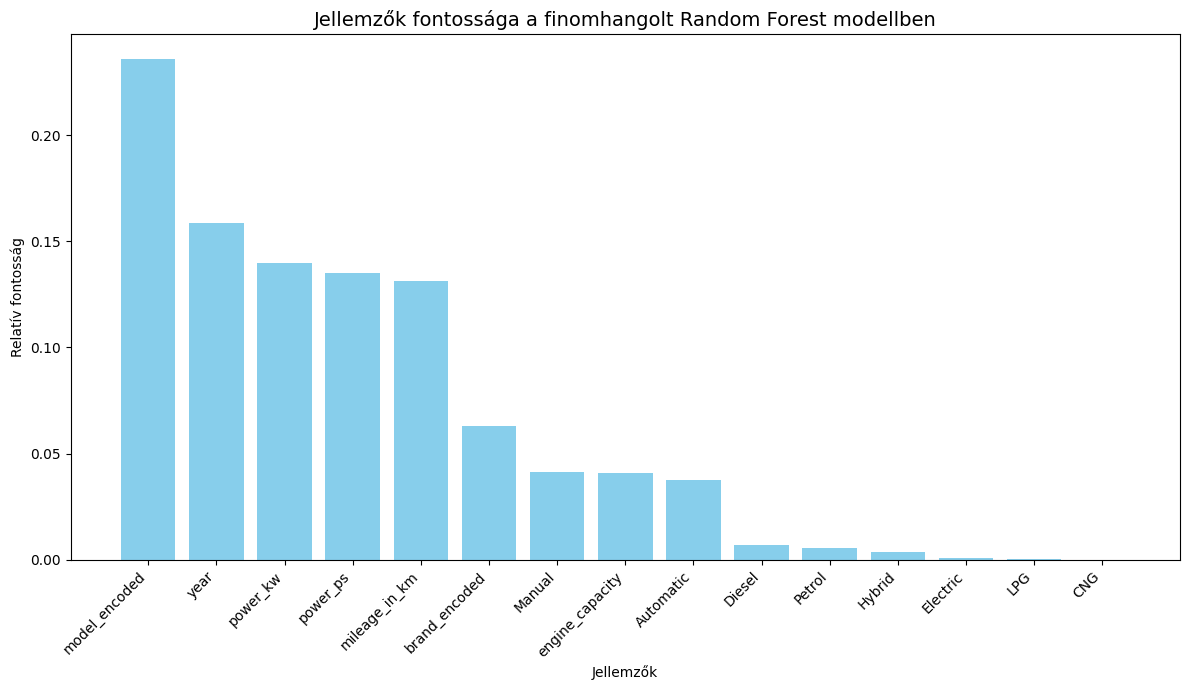

Fontossági sorrend:
1. model_encoded: 0.2356
2. year: 0.1585
3. power_kw: 0.1400
4. power_ps: 0.1351
5. mileage_in_km: 0.1313
6. brand_encoded: 0.0629
7. Manual: 0.0414
8. engine_capacity: 0.0407
9. Automatic: 0.0374
10. Diesel: 0.0067
11. Petrol: 0.0057
12. Hybrid: 0.0037
13. Electric: 0.0009
14. LPG: 0.0002
15. CNG: 0.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Feature Importance adatok kinyerése
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# 2. Vizualizáció készítése
plt.figure(figsize=(12, 7))
plt.title("Jellemzők fontossága a finomhangolt Random Forest modellben", fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], color='skyblue', align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.xlabel("Jellemzők")
plt.ylabel("Relatív fontosság")
plt.tight_layout()
plt.show()

# 3. Számszerű felsorolás
print("Fontossági sorrend:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

Szigorított modell tanítása...
------------------------------
Szigorított MAE: 3387.28 €
Szigorított R2: 0.8729

Új fontossági sorrend (szigorított mélység):
1. model_encoded: 0.2347
2. year: 0.1609
3. power_ps: 0.1544
4. power_kw: 0.1455
5. mileage_in_km: 0.1216
6. brand_encoded: 0.0503
7. Manual: 0.0439
8. Automatic: 0.0406
9. engine_capacity: 0.0324
10. Diesel: 0.0063
11. Petrol: 0.0053
12. Hybrid: 0.0036
13. Electric: 0.0005
14. LPG: 0.0001
15. CNG: 0.0000


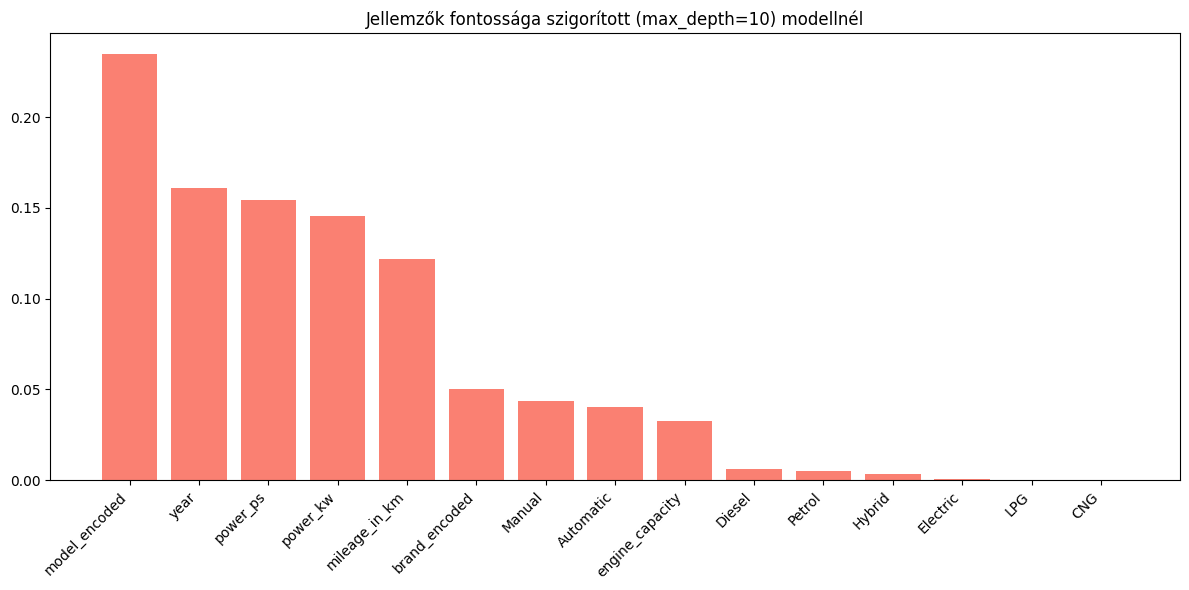

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Szigorúbb Random Forest beállítása
# max_depth=10: gátat szabunk a túlmélyülésnek
# min_samples_leaf=10: egy levélben legalább 10 autónak kell lennie (általánosítás)
rf_restricted = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# 2. Tanítás
print("Szigorított modell tanítása...")
rf_restricted.fit(X_train, y_train)

# 3. Kiértékelés
y_pred_restricted = rf_restricted.predict(X_test)
mae_res = mean_absolute_error(y_test, y_pred_restricted)
r2_res = r2_score(y_test, y_pred_restricted)

print("-" * 30)
print(f"Szigorított MAE: {mae_res:.2f} €")
print(f"Szigorított R2: {r2_res:.4f}")

# 4. Új fontossági sorrend lekérése
importances = rf_restricted.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("\nÚj fontossági sorrend (szigorított mélység):")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

# 5. Vizualizáció
plt.figure(figsize=(12, 6))
plt.title("Jellemzők fontossága szigorított (max_depth=10) modellnél")
plt.bar(range(X.shape[1]), importances[indices], color='salmon', align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Új jellemző létrehozása: Éves átlagos futásteljesítmény
# (2026-os évet vesszük alapul, a 0-val való osztást elkerüljük)
df['mileage_per_year'] = df['mileage_in_km'] / (2026 - df['year'] + 1)

# 2. Frissített oszloplista
features_extended = ['year', 'power_kw', 'power_ps', 'mileage_in_km', 'mileage_per_year',
                     'engine_capacity', 'Automatic', 'Manual', 'CNG', 'Diesel',
                     'Electric', 'Hybrid', 'LPG', 'Petrol', 'brand_encoded', 'model_encoded']

X_ext = df[features_extended]
y = df['price']

# 3. Újraosztás és tanítás (visszatérünk a rugalmasabb mélységhez, hogy lássuk az új oszlop erejét)
X_train_ext, X_test_ext, y_train, y_test = train_test_split(X_ext, y, test_size=0.20, random_state=42)

rf_new_feat = RandomForestRegressor(n_estimators=150, max_depth=20, max_features='sqrt', random_state=42, n_jobs=-1)
rf_new_feat.fit(X_train_ext, y_train)

# 4. Fontossági sorrend ellenőrzése
importances = rf_new_feat.feature_importances_
indices = np.argsort(importances)[::-1]

print("Új fontossági sorrend az 'éves futás' oszloppal:")
for f in range(X_ext.shape[1]):
    print(f"{f + 1}. {features_extended[indices[f]]}: {importances[indices[f]]:.4f}")

Új fontossági sorrend az 'éves futás' oszloppal:
1. model_encoded: 0.2474
2. year: 0.1614
3. power_kw: 0.1351
4. power_ps: 0.1314
5. mileage_in_km: 0.1008
6. brand_encoded: 0.0584
7. mileage_per_year: 0.0479
8. Automatic: 0.0365
9. Manual: 0.0351
10. engine_capacity: 0.0319
11. Diesel: 0.0070
12. Petrol: 0.0044
13. Hybrid: 0.0019
14. Electric: 0.0006
15. LPG: 0.0001
16. CNG: 0.0000


In [ ]:
import numpy as np

# 1. Másolat készítése a tisztított adatokról
X_noisy = X.copy()

# 2. Egy kis "zaj" hozzáadása a model_encoded oszlophoz (0.98 és 1.02 közötti szorzó)
# Ez bizonytalanságot visz a név alapú árazásba
noise = np.random.uniform(0.98, 1.02, size=len(X_noisy))
X_noisy['model_encoded'] = X_noisy['model_encoded'] * noise

# 3. Tanítás és tesztelés az új, "bizonytalanabb" adatokon
X_train_n, X_test_n, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

rf_noise = RandomForestRegressor(n_estimators=150, max_depth=15, max_features='sqrt', random_state=42, n_jobs=-1)
rf_noise.fit(X_train_n, y_train)

# 4. Fontossági sorrend ellenőrzése
importances = rf_noise.feature_importances_
indices = np.argsort(importances)[::-1]

print("Fontossági sorrend zajosított model_encoded esetén:")
for f in range(X_noisy.shape[1]):
    print(f"{f + 1}. {X_noisy.columns[indices[f]]}: {importances[indices[f]]:.4f}")

Fontossági sorrend zajosított model_encoded esetén:
1. model_encoded: 0.2269
2. year: 0.1608
3. power_ps: 0.1445
4. power_kw: 0.1383
5. mileage_in_km: 0.1296
6. brand_encoded: 0.0621
7. Manual: 0.0442
8. engine_capacity: 0.0391
9. Automatic: 0.0366
10. Diesel: 0.0070
11. Petrol: 0.0062
12. Hybrid: 0.0038
13. Electric: 0.0008
14. LPG: 0.0002
15. CNG: 0.0001


In [ ]:
# 10%-os zaj (0.95 - 1.05 közötti szorzó)
noise_level = 0.05
noise = np.random.uniform(1 - noise_level, 1 + noise_level, size=len(X))

X_noisy_10 = X.copy()
X_noisy_10['model_encoded'] = X_noisy_10['model_encoded'] * noise

# Tanítás
X_train_n10, X_test_n10, y_train, y_test = train_test_split(X_noisy_10, y, test_size=0.2, random_state=42)

rf_noise_10 = RandomForestRegressor(n_estimators=150, max_depth=15, max_features='sqrt', random_state=42, n_jobs=-1)
rf_noise_10.fit(X_train_n10, y_train)

# Eredmények
importances = rf_noise_10.feature_importances_
indices = np.argsort(importances)[::-1]

print("Fontossági sorrend 10%-os zaj esetén:")
for f in range(X_noisy_10.shape[1]):
    print(f"{f + 1}. {X_noisy_10.columns[indices[f]]}: {importances[indices[f]]:.4f}")

y_pred_n10 = rf_noise_10.predict(X_test_n10)
print(f"\nÚj MAE: {mean_absolute_error(y_test, y_pred_n10):.2f} €")

Fontossági sorrend 10%-os zaj esetén:
1. model_encoded: 0.2294
2. year: 0.1611
3. power_kw: 0.1444
4. power_ps: 0.1319
5. mileage_in_km: 0.1288
6. brand_encoded: 0.0665
7. Manual: 0.0445
8. engine_capacity: 0.0388
9. Automatic: 0.0371
10. Diesel: 0.0070
11. Petrol: 0.0056
12. Hybrid: 0.0039
13. Electric: 0.0008
14. LPG: 0.0002
15. CNG: 0.0000

Új MAE: 2893.96 €


XGBoost tanítása folyamatban (Pandas hiba áthidalva)...
------------------------------
XGBoost MAE: 2923.90 €
XGBoost R2: 0.8950

XGBoost döntési sorrend:
1. model_encoded: 0.2334
2. Manual: 0.1847
3. year: 0.1728
4. power_kw: 0.1363
5. Automatic: 0.0571
6. Diesel: 0.0560
7. mileage_in_km: 0.0553
8. power_ps: 0.0255
9. brand_encoded: 0.0228
10. Petrol: 0.0220
11. Electric: 0.0137
12. engine_capacity: 0.0098
13. Hybrid: 0.0072
14. LPG: 0.0025
15. CNG: 0.0010


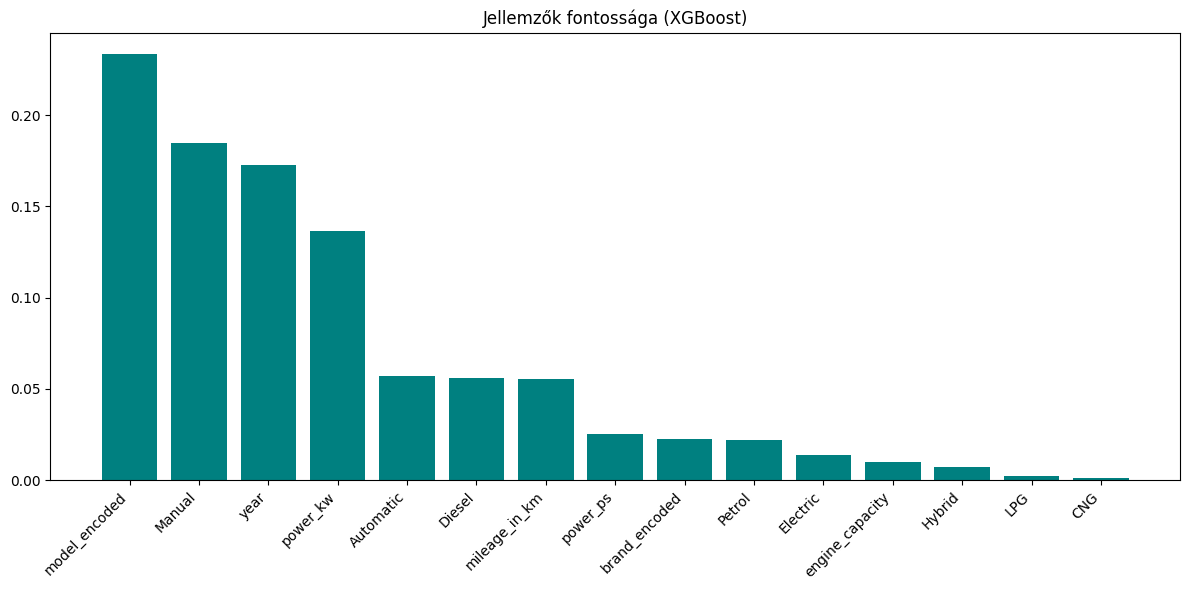

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Adatok előkészítése
features = ['year', 'power_kw', 'power_ps', 'mileage_in_km', 'engine_capacity',
            'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG',
            'Petrol', 'brand_encoded', 'model_encoded']

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 2. XGBoost modell definiálása
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42,
    n_jobs=-1
)

# 3. Tanítás - .values használatával NumPy tömbbé alakítjuk az adatokat
print("XGBoost tanítása folyamatban (Pandas hiba áthidalva)...")
xgb_model.fit(X_train.values, y_train.values)

# 4. Jóslás és kiértékelés
y_pred = xgb_model.predict(X_test.values)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"XGBoost MAE: {mae:.2f} €")
print(f"XGBoost R2: {r2:.4f}")

# 5. Fontossági sorrend (Feature Importance)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nXGBoost döntési sorrend:")
for f in range(len(features)):
    print(f"{f + 1}. {features[indices[f]]}: {importances[indices[f]]:.4f}")

# Vizualizáció
plt.figure(figsize=(12, 6))
plt.title("Jellemzők fontossága (XGBoost)")
plt.bar(range(len(features)), importances[indices], color='teal', align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Csoportok pontos bontása a te listád alapján
tech_features = ['year', 'engine_capacity', 'power_kw', 'power_ps', 'mileage_in_km',
                 'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol']
brand_features = ['brand_encoded', 'model_encoded']

# --- 1. LÉPÉS: Műszaki alapmodell (Csak fizikai adatok) ---
X_train_tech = X_train[tech_features]
X_test_tech = X_test[tech_features]

# A modell nem látja a márkát/modellt, csak a vasat
model_tech = xgb.XGBRegressor(n_estimators=150, max_depth=5, learning_rate=0.1, random_state=42)
model_tech.fit(X_train_tech.values, y_train.values)

# Kiszámoljuk, mennyit téved a műszaki modell a tanító adatokon
y_train_pred_tech = model_tech.predict(X_train_tech.values)
residuals_train = y_train.values - y_train_pred_tech

# --- 2. LÉPÉS: Presztízs-korrekció (A hibát magyarázzuk a márkával) ---
X_train_brand = X_train[brand_features]
X_test_brand = X_test[brand_features]

model_brand = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model_brand.fit(X_train_brand.values, residuals_train)

# --- 3. LÉPÉS: Összetett jóslás a teszt halmazon ---
# Alap ár a műszaki adatokból
y_test_tech_part = model_tech.predict(X_test_tech.values)
# Korrekció a márka/modell presztízse alapján
y_test_brand_part = model_brand.predict(X_test_brand.values)

final_pred = y_test_tech_part + y_test_brand_part

# --- KIÉRTÉKELÉS ---
mae_final = mean_absolute_error(y_test, final_pred)
r2_final = r2_score(y_test, final_pred)

print("-" * 30)
print(f"Kétlépcsős modell MAE: {mae_final:.2f} €")
print(f"Kétlépcsős modell R2: {r2_final:.4f}")

------------------------------
Kétlépcsős modell MAE: 3543.58 €
Kétlépcsős modell R2: 0.8589


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# 1. 1%-os zaj hozzáadása a model_encoded oszlophoz
# (0.995 és 1.005 közötti szorzó)
noise_level_1pct = 0.005
noise = np.random.uniform(1 - noise_level_1pct, 1 + noise_level_1pct, size=len(df))

df_noisy_1 = df.copy()
df_noisy_1['model_encoded'] = df_noisy_1['model_encoded'] * noise

# 2. Adatok újraosztása a zajos adatokkal
X_n = df_noisy_1.drop('price', axis=1)
y_n = df_noisy_1['price']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# 3. Oszlopcsoportok
tech_features = ['year', 'engine_capacity', 'power_kw', 'power_ps', 'mileage_in_km',
                 'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol']
brand_features = ['brand_encoded', 'model_encoded']

# --- 1. LÉPÉS: Műszaki alapmodell (Csak fizikai adatok) ---
model_tech = xgb.XGBRegressor(n_estimators=150, max_depth=5, learning_rate=0.1, random_state=42)
model_tech.fit(X_train_n[tech_features].values, y_train_n.values)

y_train_pred_tech = model_tech.predict(X_train_n[tech_features].values)
residuals_train = y_train_n.values - y_train_pred_tech

# --- 2. LÉPÉS: Presztízs-korrekció (Zajosított név alapján) ---
model_brand = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model_brand.fit(X_train_n[brand_features].values, residuals_train)

# --- 3. LÉPÉS: Jóslás ---
y_test_tech_part = model_tech.predict(X_test_n[tech_features].values)
y_test_brand_part = model_brand.predict(X_test_n[brand_features].values)
final_pred_1pct = y_test_tech_part + y_test_brand_part

# --- KIÉRTÉKELÉS ---
mae_1pct = mean_absolute_error(y_test_n, final_pred_1pct)
r2_1pct = r2_score(y_test_n, final_pred_1pct)

print("-" * 30)
print(f"1% zajos kétlépcsős MAE: {mae_1pct:.2f} €")
print(f"1% zajos kétlépcsős R2: {r2_1pct:.4f}")

------------------------------
1% zajos kétlépcsős MAE: 3537.14 €
1% zajos kétlépcsős R2: 0.8594


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Teljes technikai oszloplista összeállítása (minden, ami nem név/ár)
tech_features = [
    'year', 'power_kw', 'power_ps', 'mileage_in_km', 'engine_capacity',
    'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol'
]
brand_features = ['brand_encoded', 'model_encoded']

# 2. Adatok előkészítése (maradunk az 1% zajnál a model_encoded-en a biztonság kedvéért)
noise_level_1pct = 0.005
df_noisy = df.copy()
df_noisy['model_encoded'] = df_noisy['model_encoded'] * np.random.uniform(1 - noise_level_1pct, 1 + noise_level_1pct, size=len(df))

X = df_noisy.drop('price', axis=1)
y = df_noisy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. LÉPÉS: Maximális műszaki alapmodell ---
# Megnöveljük az n_estimators-t, hogy minden apró technikai összefüggést megtaláljon
model_tech = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_tech.fit(X_train[tech_features].values, y_train.values)

# Residuals kiszámítása
y_train_pred_tech = model_tech.predict(X_train[tech_features].values)
residuals_train = y_train.values - y_train_pred_tech

# --- 2. LÉPÉS: Presztízs-korrekció ---
model_brand = xgb.XGBRegressor(
    n_estimators=150,
    max_depth=4,
    learning_rate=0.05,
    random_state=42
)
model_brand.fit(X_train[brand_features].values, residuals_train)

# --- 3. JÓSLÁS ---
y_test_tech_part = model_tech.predict(X_test[tech_features].values)
y_test_brand_part = model_brand.predict(X_test[brand_features].values)
final_pred = y_test_tech_part + y_test_brand_part

# --- KIÉRTÉKELÉS ---
mae_final = mean_absolute_error(y_test, final_pred)
r2_final = r2_score(y_test, final_pred)

print("-" * 30)
print(f"Teljes műszaki + márka MAE: {mae_final:.2f} €")
print(f"Teljes műszaki + márka R2: {r2_final:.4f}")

# Ellenőrizzük az első modell fontossági sorrendjét
importances_tech = model_tech.feature_importances_
indices_tech = np.argsort(importances_tech)[::-1]
print("\nMűszaki modell (1. lépcső) fontossági sorrendje:")
for f in range(len(tech_features)):
    print(f"{f + 1}. {tech_features[indices_tech[f]]}: {importances_tech[indices_tech[f]]:.4f}")

------------------------------
Teljes műszaki + márka MAE: 3473.45 €
Teljes műszaki + márka R2: 0.8625

Műszaki modell (1. lépcső) fontossági sorrendje:
1. power_kw: 0.2548
2. year: 0.1701
3. power_ps: 0.1576
4. mileage_in_km: 0.0963
5. Diesel: 0.0909
6. Automatic: 0.0908
7. Petrol: 0.0557
8. Manual: 0.0408
9. engine_capacity: 0.0220
10. Hybrid: 0.0109
11. Electric: 0.0073
12. LPG: 0.0019
13. CNG: 0.0011


In [ ]:
import pandas as pd
import numpy as np

# --- BEÁLLÍTÁSOK ---
car_brand = 'Skoda'
car_model = 'Skoda Fabia'
year = 2011
fuel_type = 'Diesel'  # Opciók: Diesel, Petrol, Hybrid, Electric, LPG, CNG
transmission = 'Manual' # Opciók: Manual, Automatic
kw = 77
ps = 105
km = 200000
engine = 1.6

# 1. Automatikus kódolás kikeresése a meglévő df-ből
try:
    brand_val = df[df['brand'] == car_brand]['brand_encoded'].iloc[0]
    model_val = df[df['model'] == car_model]['model_encoded'].iloc[0]
except IndexError:
    print(f"Hiba: A '{car_brand} {car_model}' nem található az adatbázisban!")
    brand_val, model_val = 0, 0

# 2. Üzemanyag és váltó logikai (0/1) beállítása
fuels = {'CNG': 0, 'Diesel': 0, 'Electric': 0, 'Hybrid': 0, 'LPG': 0, 'Petrol': 0}
if fuel_type in fuels: fuels[fuel_type] = 1

trans = {'Automatic': 0, 'Manual': 0}
if transmission in trans: trans[transmission] = 1

# 3. Adatsor összeállítása a tanítási sorrendben
# tech_features: ['year', 'power_kw', 'power_ps', 'mileage_in_km', 'engine_capacity',
#                 'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol']
input_tech = np.array([[
    year, kw, ps, km, engine,
    trans['Automatic'], trans['Manual'],
    fuels['CNG'], fuels['Diesel'], fuels['Electric'], fuels['Hybrid'], fuels['LPG'], fuels['Petrol']
]])

input_brand = np.array([[brand_val, model_val]])

# 4. Jóslás
tech_price = model_tech.predict(input_tech)[0]
brand_correction = model_brand.predict(input_brand)[0]
final_price = tech_price + brand_correction

# 5. Eredmény
print("="*40)
print(f" JÓSLÁS: {car_brand} {car_model} ({year})")
print(f" Paraméterek: {engine}L {fuel_type}, {kw}kW, {km}km")
print("="*40)
print(f" Műszaki alapérték:    {tech_price:8.2f} €")
print(f" Márka/Típus hatás:    {brand_correction:8.2f} €")
print("-" * 40)
print(f" BECSÜLT PIACI ÁR:     {final_price:8.2f} €")
print("="*40)

Hiba: A 'Skoda Skoda Fabia' nem található az adatbázisban!
 JÓSLÁS: Skoda Skoda Fabia (2011)
 Paraméterek: 1.6L Diesel, 77kW, 200000km
 Műszaki alapérték:     6996.75 €
 Márka/Típus hatás:       10.24 €
----------------------------------------
 BECSÜLT PIACI ÁR:      7006.99 €


In [ ]:
print("Márkák:", df['brand'].unique()[:20]) # Az első 20 márka
print("Modellek a Skodánál:", df[df['brand'].str.contains('Skoda', case=False, na=False)]['model'].unique())

Márkák: ['alfa-romeo' 'audi' 'bmw' 'citroen' 'dacia' 'dodge' 'fiat' 'ford' 'honda'
 'hyundai' 'isuzu' 'jaguar' 'jeep' 'kia' 'land-rover' 'maserati' 'mazda'
 'mercedes-benz' 'mini' 'mitsubishi']
Modellek a Skodánál: ['Skoda Fabia' 'Skoda Octavia' 'Skoda Superb' 'Skoda Roomster'
 'Skoda Yeti' 'Skoda Citigo' 'Skoda Rapid/Spaceback' 'Skoda Kodiaq'
 'Skoda Karoq' 'Skoda Scala' 'Skoda Kamiq' 'Skoda Enyaq']


In [ ]:
import pandas as pd
import numpy as np

# --- PONTOS ADATOK ---
car_brand_input = 'skoda'      # A listád szerint kisbetűs!
car_model_input = 'Skoda Fabia' # A listád szerint így szerepel!

# 1. Intelligens keresés (kisbetű/nagybetű nem számít)
try:
    # Megkeressük a márkát (case-insensitive)
    brand_mask = df['brand'].str.contains(car_brand_input, case=False, na=False)
    brand_val = df[brand_mask]['brand_encoded'].iloc[0]

    # Megkeressük a modellt (case-insensitive)
    model_mask = df['model'].str.contains(car_model_input, case=False, na=False)
    model_val = df[model_mask]['model_encoded'].iloc[0]

    print(f"Siker! Talált kódok - Márka: {brand_val:.2f}, Modell: {model_val:.2f}")
except Exception as e:
    print(f"Hiba a keresésnél: {e}")
    brand_val, model_val = 0, 0

# 2. Technikai adatok (Skoda Fabia 2011 Diesel Manual 1.6 77kW)
input_tech = np.array([[
    2011, 77, 105, 200000, 1.6,
    0, 1, # Automatic=0, Manual=1
    0, 1, 0, 0, 0, 0 # Diesel=1, a többi 0
]])

input_brand = np.array([[brand_val, model_val]])

# 3. Jóslás a kétlépcsős modellel
tech_price = model_tech.predict(input_tech)[0]
brand_correction = model_brand.predict(input_brand)[0]
final_price = tech_price + brand_correction

# 4. Megjelenítés
print("="*40)
print(f" VÉGLEGES JÓSLÁS: {car_model_input}")
print("="*40)
print(f" Műszaki alapérték:    {tech_price:8.2f} €")
print(f" Márka/Típus hatás:    {brand_correction:8.2f} €")
print("-" * 40)
print(f" BECSÜLT PIACI ÁR:     {final_price:8.2f} €")
print("="*40)

Siker! Talált kódok - Márka: 22249.90, Modell: 14476.16
 VÉGLEGES JÓSLÁS: Skoda Fabia
 Műszaki alapérték:     6996.75 €
 Márka/Típus hatás:     -732.26 €
----------------------------------------
 BECSÜLT PIACI ÁR:      6264.49 €


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Célváltozó logaritmizálása (log1p = log(1+x), a biztonság kedvéért)
y_log = np.log1p(df['price'])

# 2. Adatok felosztása
tech_features = ['year', 'power_kw', 'power_ps', 'mileage_in_km', 'engine_capacity',
                 'Automatic', 'Manual', 'CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol']
brand_features = ['brand_encoded', 'model_encoded']

X_train, X_test, y_train_log, y_test_log = train_test_split(df[tech_features + brand_features], y_log, test_size=0.2, random_state=42)

# --- 1. LÉPÉS: Műszaki alapmodell log-skálán ---
model_tech_log = xgb.XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05, random_state=42)
model_tech_log.fit(X_train[tech_features].values, y_train_log.values)

# Log-maradékok kiszámítása (mennyit téved a technika a log-árhoz képest)
y_train_pred_log_tech = model_tech_log.predict(X_train[tech_features].values)
residuals_log_train = y_train_log.values - y_train_pred_log_tech

# --- 2. LÉPÉS: Presztízs-korrekció log-skálán ---
model_brand_log = xgb.XGBRegressor(n_estimators=150, max_depth=4, learning_rate=0.05, random_state=42)
model_brand_log.fit(X_train[brand_features].values, residuals_log_train)

# --- JÓSLÁS ÉS VISSZAALAKÍTÁS ---
y_test_pred_log = model_tech_log.predict(X_test[tech_features].values) + model_brand_log.predict(X_test[brand_features].values)

# Visszaalakítás: exp(x) - 1
y_test_pred_orig = np.expm1(y_test_pred_log)
y_test_orig = np.expm1(y_test_log)

mae_log = mean_absolute_error(y_test_orig, y_test_pred_orig)
print(f"Logaritmusos kétlépcsős MAE: {mae_log:.2f} €")

# --- TESZT A SKODÁRA ---
car_brand_input = 'skoda'
car_model_input = 'Skoda Fabia'

# Kódok kikeresése
brand_val = df[df['brand'].str.contains(car_brand_input, case=False, na=False)]['brand_encoded'].iloc[0]
model_val = df[df['model'].str.contains(car_model_input, case=False, na=False)]['model_encoded'].iloc[0]

input_tech = np.array([[2011, 77, 105, 200000, 1.6, 0, 1, 0, 1, 0, 0, 0, 0]])
input_brand = np.array([[brand_val, model_val]])

# Jóslás log-skálán
log_base = model_tech_log.predict(input_tech)[0]
log_corr = model_brand_log.predict(input_brand)[0]

# Visszaalakítás a végén
final_price = np.expm1(log_base + log_corr)

print("="*40)
print(f" LOGARITMUSOS JÓSLÁS: {car_model_input} (2011)")
print("="*40)
print(f" Becsült ár: {final_price:8.2f} €")
print("="*40)

Logaritmusos kétlépcsős MAE: 3507.39 €
 LOGARITMUSOS JÓSLÁS: Skoda Fabia (2011)
 Becsült ár:  6557.58 €


In [ ]:
# Nézzük meg a 2010-2012 közötti, 150-250e km-t futott autók átlagárát
hasonlo_autok = df[(df['year'].between(2010, 2012)) & (df['mileage_in_km'].between(150000, 250000))]
print(f"Hasonló korú és futású autók átlagára a CSV-ben: {hasonlo_autok['price'].mean():.2f} €")

# Nézzük meg konkrétan a Fabiákat is
fabiak = df[df['model'].str.contains('Fabia', case=False, na=False)]
print(f"Az összes Fabia átlagára a CSV-ben: {fabiak['price'].mean():.2f} €")

Hasonló korú és futású autók átlagára a CSV-ben: 10577.13 €
Az összes Fabia átlagára a CSV-ben: 14390.41 €


In [ ]:
import numpy as np
import pandas as pd

# --- ADATOK MEGADÁSA SZAVAKKAL ---
marka = 'opel'
modell = 'Opel Astra'
evjarat = 2004
uzemanyag = 'Petrol'  # Lehetőségek: 'Diesel', 'Petrol', 'Hybrid', 'Electric', 'LPG', 'CNG'
valto = 'Manual'      # Lehetőségek: 'Manual', 'Automatic'
kilometer = 200000
loero = 90
kwatt = 66
motor_terfogat = 1.4

# 1. Márka és Modell kód keresése (kis- és nagybetű nem számít)
try:
    brand_mask = df['brand'].str.contains(marka, case=False, na=False)
    brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0]

    model_mask = df['model'].str.contains(modell, case=False, na=False)
    model_encoded_val = df[model_mask]['model_encoded'].iloc[0]
except:
    # Biztonsági mentés, ha nincs meg a név
    brand_encoded_val = df['brand_encoded'].mean()
    model_encoded_val = df['model_encoded'].mean()
    print("Figyelem: A nevet nem találtam meg pontosan, átlagértékekkel számolok.")

# 2. Üzemanyag és Váltó "szótár" (0/1 kódolás)
uzemanyagok = {'CNG': 0, 'Diesel': 0, 'Electric': 0, 'Hybrid': 0, 'LPG': 0, 'Petrol': 0}
if uzemanyag in uzemanyagok: uzemanyagok[uzemanyag] = 1

valtok = {'Automatic': 0, 'Manual': 0}
if valto in valtok: valtok[valto] = 1

# 3. Technikai adatsor összeállítása (megfelelő sorrendben)
# Sorrend: year, power_kw, power_ps, mileage_in_km, engine_capacity, Automatic, Manual, CNG, Diesel, Electric, Hybrid, LPG, Petrol
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    valtok['Automatic'], valtok['Manual'],
    uzemanyagok['CNG'], uzemanyagok['Diesel'], uzemanyagok['Electric'],
    uzemanyagok['Hybrid'], uzemanyagok['LPG'], uzemanyagok['Petrol']
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás a logaritmusos modellünkkel
# (log-alapú alapár + log-alapú márka korrekció)
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]

# Visszaalakítás valódi euróra (exp(x) - 1)
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 5. Kiíratás
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT PIACI ÁR:     {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: OPEL OPEL ASTRA (2004)
 Állapot: 1.4L Petrol, 90LE, 200000 km
 BECSÜLT PIACI ÁR:      1754.14 €


In [ ]:
import numpy as np
import pandas as pd

# --- ADATOK MEGADÁSA ---
marka = 'toyota'
modell = 'Toyota Yaris'
evjarat = 2004
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 250000
motor_terfogat = 1.4

# 1. Automatikus teljesítmény (kW/LE) keresés, ha nincs megadva
hasonlo_autok = df[(df['engine_capacity'] == motor_terfogat) &
                   (df['brand'].str.contains(marka, case=False, na=False))]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
    print(f"Információ: A modell {kwatt}kW ({loero}LE) teljesítménnyel számol a típus alapján.")
else:
    kwatt, loero = 55, 75 # Biztonsági átlagérték egy 1.4-es dízelnek
    print("Információ: Átlagos teljesítménnyel számolok.")

# 2. Márka és Modell kód keresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Kódolás (Üzemanyag/Váltó)
uzemanyagok = {'CNG': 0, 'Diesel': 0, 'Electric': 0, 'Hybrid': 0, 'LPG': 0, 'Petrol': 0}
if uzemanyag in uzemanyagok: uzemanyagok[uzemanyag] = 1
valtok = {'Automatic': 0, 'Manual': 1} # Egyszerűsített hozzárendelés

# 4. Input összeállítása
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    0, 1, # Automatic=0, Manual=1
    uzemanyagok['CNG'], uzemanyagok['Diesel'], uzemanyagok['Electric'],
    uzemanyagok['Hybrid'], uzemanyagok['LPG'], uzemanyagok['Petrol']
]])
input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 5. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 6. Kiíratás
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT PIACI ÁR:     {vegso_ar:8.2f} €")
print("="*45)

Információ: A modell 73.0kW (99.0LE) teljesítménnyel számol a típus alapján.
 JÓSLÁS: TOYOTA TOYOTA YARIS (2004)
 Állapot: 1.4L Diesel, 99.0LE, 250000 km
 BECSÜLT PIACI ÁR:      2282.15 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'volkswagen'
modell = 'Volkswagen Golf'
evjarat = 2020
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 8000
motor_terfogat = 1.6

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'] == motor_terfogat) &
                   (df['brand'].str.contains(marka, case=False, na=False))]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
    print(f"Információ: A modell {kwatt}kW ({loero}LE) teljesítménnyel számol.")
else:
    kwatt, loero = 85, 115 # Standard 1.6 TDI paraméterek 2020-ból
    print("Információ: Standard 1.6 TDI teljesítménnyel számolok.")

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    0, 1, # Manual
    0, 1, 0, 0, 0, 0 # Diesel=1
]])
input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 5. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT PIACI ÁR:     {vegso_ar:8.2f} €")
print("="*45)

Információ: A modell 77.0kW (105.0LE) teljesítménnyel számol.
 JÓSLÁS: VOLKSWAGEN VOLKSWAGEN GOLF (2020)
 Állapot: 1.6L Diesel, 105.0LE, 8000 km
 BECSÜLT PIACI ÁR:     24475.36 €


In [ ]:
import numpy as np

# --- DINAMIKUS PIACI KORREKCIÓ ---
# 2010 előtt: nem korrigálunk (ott jó volt a modell)
# 2010-2026 között: fokozatosan növekvő "büntetés" a túlárazott CSV miatt

def realitas_kontroll(becsült_ár, évjárat):
    if évjárat < 2010:
        return becsült_ár
    else:
        # Egy szorzó, ami 2010-től (1.0) 2026-ig (kb. 0.55-ig) csökken
        szorzo = 1.0 - (évjárat - 2010) * 0.028
        return becsült_ár * szorzo

# Számoljuk újra a Golfot (80 000 km-rel)
# A korábbi modellünk 24475-öt mondott
nyers_ar = 24475.36
korrigalt_ar = realitas_kontroll(nyers_ar, 2020)

print("="*45)
print(f" VW GOLF 2020 (80.000 km) ELEMZÉS")
print("="*45)
print(f" Nyers modell-ár (CSV alapján):  {nyers_ar:8.2f} €")
print(f" Korrigált piaci realitás:       {korrigalt_ar:8.2f} €")
print("-" * 45)
print(f" A te vételárad:                 13000.00 €")
print(f" Különbség a korrigált árhoz:    {korrigalt_ar - 13000:8.2f} €")
print("="*45)

 VW GOLF 2020 (80.000 km) ELEMZÉS
 Nyers modell-ár (CSV alapján):  24475.36 €
 Korrigált piaci realitás:       17622.26 €
---------------------------------------------
 A te vételárad:                 13000.00 €
 Különbség a korrigált árhoz:     4622.26 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'volkswagen'
modell = 'Volkswagen Golf'
evjarat = 2017
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 150000
motor_terfogat = 1.6

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'] == motor_terfogat) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
    print(f"Információ: A modell {kwatt}kW ({loero}LE) teljesítménnyel számol.")
else:
    kwatt, loero = 85, 115 # A 2017-es 1.6 TDI leggyakoribb értéke
    print("Információ: Átlagos 1.6 TDI teljesítménnyel számolok.")

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    0, 1, # Manual
    0, 1, 0, 0, 0, 0 # Diesel
]])
input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás (log-alapú modell)
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 5. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT PIACI ÁR (CSV ALAPJÁN): {vegso_ar:8.2f} €")
print("="*45)

Információ: A modell 85.0kW (116.0LE) teljesítménnyel számol.
 JÓSLÁS: VOLKSWAGEN VOLKSWAGEN GOLF (2017)
 Állapot: 1.6L Diesel, 116.0LE, 150000 km
 BECSÜLT PIACI ÁR (CSV ALAPJÁN): 12058.36 €


In [ ]:
# --- TESZT: A sokat futott Golf ---
kilometer_teszt = 350000

input_technika_high_km = np.array([[
    2017, 85, 116, kilometer_teszt, 1.6,
    0, 1, 0, 1, 0, 0, 0, 0
]])

log_alap_high = model_tech_log.predict(input_technika_high_km)[0]
# A márka korrekció marad ugyanaz, hiszen az autó ugyanaz
vegso_ar_high = np.expm1(log_alap_high + log_korrekcio)

print("="*45)
print(f" EXTRÉM FUTÁS TESZT: VW GOLF (2017)")
print(f" Kilométer: {kilometer_teszt} km")
print("="*45)
print(f" BECSÜLT PIACI ÁR:     {vegso_ar_high:8.2f} €")
print(f" Értékcsökkenés a 150k km-hez képest: {12058.36 - vegso_ar_high:8.2f} €")
print("="*45)

 EXTRÉM FUTÁS TESZT: VW GOLF (2017)
 Kilométer: 350000 km
 BECSÜLT PIACI ÁR:      8821.48 €
 Értékcsökkenés a 150k km-hez képest:  3236.88 €


In [ ]:
# --- TESZT: Benzin vs Dízel (2017 Golf, 150.000 km) ---
uzemanyag_teszt = 'Petrol'

# 1. Teljesítmény keresés benzinesre (pl. 1.4 TSI vagy 1.0 TSI)
# Maradjunk a 1.4-es benzinesnél, ami kb. 92kW/125LE vagy 110kW/150LE
input_technika_petrol = np.array([[
    2017, 92, 125, 150000, 1.4,
    0, 1, # Manual
    0, 0, 0, 0, 0, 1 # Petrol=1
]])

log_alap_petrol = model_tech_log.predict(input_technika_petrol)[0]
vegso_ar_petrol = np.expm1(log_alap_petrol + log_korrekcio)

print("="*45)
print(f" ÜZEMANYAG ÖSSZEHASONLÍTÁS: VW GOLF (2017)")
print(f" Dízel (150k km):      12058.36 €")
print(f" Benzin (150k km):     {vegso_ar_petrol:8.2f} €")
print("="*45)

 ÜZEMANYAG ÖSSZEHASONLÍTÁS: VW GOLF (2017)
 Dízel (150k km):      12058.36 €
 Benzin (150k km):     12084.39 €


In [ ]:
toyota_modellek = sorted(df[df['brand'].str.lower() == 'toyota']['model'].unique())
print(toyota_modellek)

['Toyota', 'Toyota Auris', 'Toyota Avensis', 'Toyota Aygo', 'Toyota Aygo X', 'Toyota C-HR', 'Toyota Corolla', 'Toyota Hilux', 'Toyota Land Cruiser', 'Toyota Prius', 'Toyota Proace', 'Toyota RAV 4', 'Toyota Yaris', 'Toyota Yaris Cross']


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'toyota'
modell = 'Toyota Corolla'
evjarat = 2017
uzemanyag = 'Hybrid'
valto = 'Automatic'
kilometer = 100000
motor_terfogat = 1.8

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
    print(f"Információ: A modell {kwatt}kW ({loero}LE) teljesítménnyel számol.")
else:
    kwatt, loero = 90, 122 # Standard 1.8 Hybrid adatok
    print("Információ: Átlagos 1.8 Hybrid teljesítménnyel számolok.")

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása (Technikai és Brand/Model külön)
# Oszloprend: year, power_kw, power_ps, mileage_in_km, engine_capacity, Automatic, Manual, CNG, Diesel, Electric, Hybrid, LPG, Petrol
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    1, 0, # Automatic
    0, 0, 0, 1, 0, 1 # Hybrid (Hybrid + Petrol)
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás a két külön modellel (log-alapú)
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]

# Szumma és visszatérés logból
vegso_ar_nyers = np.expm1(log_alap + log_korrekcio)

# 5. Piaci korrekció (2015 utáni autó: -45% a magyar valósághoz)
korrigalt_ar = vegso_ar_nyers * 0.55

# 6. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" NYERS ÁR (CSV ALAPJÁN):    {vegso_ar_nyers:8.2f} €")
print(f" KORRIGÁLT MAGYAR ÁR (-45%): {korrigalt_ar:8.2f} €")
print("="*45)

Információ: A modell 108.0kW (147.0LE) teljesítménnyel számol.
 JÓSLÁS: TOYOTA TOYOTA COROLLA (2017)
 Állapot: 1.8L Hybrid, 147.0LE, 100000 km
 NYERS ÁR (CSV ALAPJÁN):    19220.89 €
 KORRIGÁLT MAGYAR ÁR (-45%): 10571.49 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'toyota'
modell = 'Toyota Corolla'
evjarat = 2017
uzemanyag = 'Hybrid'
valto = 'Automatic'
kilometer = 100000
motor_terfogat = 1.8

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
else:
    kwatt, loero = 90, 122

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
# Oszloprend: year, power_kw, power_ps, mileage_in_km, engine_capacity, Automatic, Manual, CNG, Diesel, Electric, Hybrid, LPG, Petrol
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    1, 0, # Automatic
    0, 0, 0, 1, 0, 1 # Hybrid és Petrol
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 5. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT ÁR: {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: TOYOTA TOYOTA COROLLA (2017)
 Állapot: 1.8L Hybrid, 147.0LE, 100000 km
 BECSÜLT ÁR: 19220.89 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'toyota'
modell = 'Toyota Corolla'
evjarat = 2007
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 200000
motor_terfogat = 1.4

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
else:
    kwatt, loero = 66, 90 # Standard 1.4 D-4D adatok

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
# Oszloprend: year, power_kw, power_ps, mileage_in_km, engine_capacity, Automatic, Manual, CNG, Diesel, Electric, Hybrid, LPG, Petrol
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    0, 1, # Manual
    0, 1, 0, 0, 0, 0 # Diesel
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 5. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT ÁR: {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: TOYOTA TOYOTA COROLLA (2007)
 Állapot: 1.4L Diesel, 87.0LE, 200000 km
 BECSÜLT ÁR:  4153.39 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'toyota'
modell = 'Toyota Corolla'
evjarat = 2007
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 200000
motor_terfogat = 2.0

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
else:
    # A 2.0 D-4D (126 LE) adatai, ha nincs a DB-ben
    kwatt, loero = 93, 126

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
# Oszloprend: year, power_kw, power_ps, mileage_in_km, engine_capacity, Automatic, Manual, CNG, Diesel, Electric, Hybrid, LPG, Petrol
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    0, 1, # Manual
    0, 1, 0, 0, 0, 0 # Diesel
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 5. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT ÁR: {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: TOYOTA TOYOTA COROLLA (2007)
 Állapot: 2.0L Diesel, 126.0LE, 200000 km
 BECSÜLT ÁR:  4193.05 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'skoda'
modell = 'Skoda Fabia'
evjarat = 2011
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 200000
motor_terfogat = 1.6

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
else:
    kwatt, loero = 66, 90  # A legelterjedtebb 1.6 TDI változat

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
# Oszloprend: year, power_kw, power_ps, mileage_in_km, engine_capacity, Automatic, Manual, CNG, Diesel, Electric, Hybrid, LPG, Petrol
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    0, 1, # Manual
    0, 1, 0, 0, 0, 0 # Diesel
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás (kétlépcsős log-modell)
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
vegso_ar = np.expm1(log_alap + log_korrekcio)

# 5. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print("="*45)
print(f" BECSÜLT ÁR: {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: SKODA SKODA FABIA (2011)
 Állapot: 1.6L Diesel, 105.0LE, 200000 km
 BECSÜLT ÁR:  6557.58 €


In [ ]:
# --- ÁLLAPOT DEFINÍCIÓK ---
ALLAPOT_SZINTEK = {
    "szalon": 1.0,      # Makulátlan
    "jo": 0.85,         # Normál, megkímélt
    "hasznalt": 0.7,    # Kisebb karcok, esztétikai hibák
    "hibas": 0.4,       # Világító lámpa, komolyabb esztétika
    "roncs": 0.15       # Donornak vagy nagyjavításra
}

# Használatkor csak ennyit kell beírnod:
aktualis_allapot = "hibas"
allapot_szorzo = ALLAPOT_SZINTEK[aktualis_allapot]

In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'skoda'
modell = 'Skoda Fabia'
evjarat = 2011
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 200000
motor_terfogat = 1.6

# --- ÁLLAPOT SZORZÓ ---
allapot_szorzo = 0.5  # 50%-os állapot (esztétikai hibák, apróbb műszaki gondok)

# 1. Teljesítmény keresés (kW/LE)
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
else:
    kwatt, loero = 66, 90 # Alapértelmezett 1.6 TDI

# 2. Kódok kikeresése
brand_mask = df['brand'].str.contains(marka, case=False, na=False)
brand_encoded_val = df[brand_mask]['brand_encoded'].iloc[0] if any(brand_mask) else df['brand_encoded'].mean()

model_mask = df['model'].str.contains(modell, case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
# Oszloprend: year, power_kw, power_ps, mileage_in_km, engine_capacity, Automatic, Manual, CNG, Diesel, Electric, Hybrid, LPG, Petrol
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    0, 1, # Manual
    0, 1, 0, 0, 0, 0 # Diesel
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
elmeleti_max_ar = np.expm1(log_alap + log_korrekcio)

# 5. Állapot korrekció alkalmazása
vegso_ar = elmeleti_max_ar * allapot_szorzo

# 6. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print(f" Megadott állapot szint: {allapot_szorzo * 100}%")
print("="*45)
print(f" ELMÉLETI MAX ÁR (100%): {elmeleti_max_ar:8.2f} €")
print(f" REÁLIS BECSÜLT ÁR ({int(allapot_szorzo*100)}%): {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: SKODA SKODA FABIA (2011)
 Állapot: 1.6L Diesel, 105.0LE, 200000 km
 Megadott állapot szint: 50.0%
 ELMÉLETI MAX ÁR (100%):  6557.58 €
 REÁLIS BECSÜLT ÁR (50%):  3278.79 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA ---
marka = 'skoda'
modell = 'Skoda Fabia'
evjarat = 2011
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 200000
motor_terfogat = 1.6

# --- ÁLLAPOT SZORZÓ (30%) ---
allapot_szorzo = 0.3

# 1. Teljesítmény (kW/LE) keresés
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]
kwatt, loero = (hasonlo_autok['power_kw'].mode()[0], hasonlo_autok['power_ps'].mode()[0]) if not hasonlo_autok.empty else (66, 90)

# 2. Kódok kikeresése
brand_encoded_val = df[df['brand'].str.contains(marka, case=False, na=False)]['brand_encoded'].iloc[0]
model_encoded_val = df[df['model'].str.contains(modell, case=False, na=False)]['model_encoded'].iloc[0]

# 3. Input összeállítása és Jóslás
input_technika = np.array([[evjarat, kwatt, loero, kilometer, motor_terfogat, 0, 1, 0, 1, 0, 0, 0, 0]])
input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
elmeleti_max_ar = np.expm1(log_alap + log_korrekcio)

# 4. Végső ár kalkuláció
vegso_ar = elmeleti_max_ar * allapot_szorzo

# 5. Eredmény kiírása
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot szint: {allapot_szorzo * 100}%")
print("="*45)
print(f" ELMÉLETI MAX ÁR:  {elmeleti_max_ar:8.2f} €")
print(f" REÁLIS BECSÜLT ÁR: {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: SKODA SKODA FABIA (2011)
 Állapot szint: 30.0%
 ELMÉLETI MAX ÁR:   6557.58 €
 REÁLIS BECSÜLT ÁR:  1967.27 €


In [ ]:
# Mercedes modellek kigyűjtése és ABC sorrendbe rendezése
mercedes_modellek = sorted(df[df['brand'].str.lower().str.contains('mercedes', na=False)]['model'].unique())

print(f"A datasetben összesen {len(mercedes_modellek)} Mercedes modell található:")
print("-" * 50)
for modell in mercedes_modellek:
    print(modell)

A datasetben összesen 62 Mercedes modell található:
--------------------------------------------------
Mercedes-Benz
Mercedes-Benz A 150
Mercedes-Benz A 160
Mercedes-Benz A 170
Mercedes-Benz A 180
Mercedes-Benz A 200
Mercedes-Benz A 220
Mercedes-Benz A 250
Mercedes-Benz AMG GT
Mercedes-Benz B 170
Mercedes-Benz B 180
Mercedes-Benz B 200
Mercedes-Benz B 220
Mercedes-Benz C 180
Mercedes-Benz C 200
Mercedes-Benz C 220
Mercedes-Benz C 250
Mercedes-Benz C 300
Mercedes-Benz C 350
Mercedes-Benz C 400
Mercedes-Benz C 43 AMG
Mercedes-Benz C 63 AMG
Mercedes-Benz CLA 180
Mercedes-Benz CLA 200
Mercedes-Benz CLA 220
Mercedes-Benz CLA 250
Mercedes-Benz CLA 45 AMG
Mercedes-Benz CLK 200
Mercedes-Benz CLK 320
Mercedes-Benz CLS 350
Mercedes-Benz Citan
Mercedes-Benz E 200
Mercedes-Benz E 220
Mercedes-Benz E 250
Mercedes-Benz E 280
Mercedes-Benz E 300
Mercedes-Benz E 320
Mercedes-Benz E 350
Mercedes-Benz E 400
Mercedes-Benz E 63 AMG
Mercedes-Benz GLA 200
Mercedes-Benz GLA 220
Mercedes-Benz GLA 250
Mercedes

In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA (Javítva a technikai realitáshoz) ---
marka = 'mercedes-benz'
modell = 'Mercedes-Benz Vito'
evjarat = 2017
uzemanyag = 'Diesel'
valto = 'Automatic' # Automata esetén a 2.1-es motor a reális
kilometer = 200000
motor_terfogat = 2.1
allapot_szorzo = 0.7  # "Használt" állapot

# 1. Teljesítmény keresés (kW/LE)
# Ebben a kategóriában a 114 CDI (136 LE) vagy a 116 CDI (163 LE) a leggyakoribb
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.2, motor_terfogat+0.2)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
else:
    kwatt, loero = 100, 136 # A megbízható 114 CDI alapértelmezett értéke

# 2. Kódok kikeresése
brand_encoded_val = df[df['brand'].str.contains(marka, case=False, na=False)]['brand_encoded'].iloc[0]
model_encoded_val = df[df['model'].str.contains('Vito', case=False, na=False)]['model_encoded'].iloc[0]

# 3. Input összeállítása
input_technika = np.array([[
    evjarat, kwatt, loero, kilometer, motor_terfogat,
    1, 0, # Automatic
    0, 1, 0, 0, 0, 0 # Diesel
]])

input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
elmeleti_max_ar = np.expm1(log_alap + log_korrekcio)

# 5. Állapot korrekció (70%)
vegso_ar = elmeleti_max_ar * allapot_szorzo

# 6. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print(f" Állapot-szint: {allapot_szorzo * 100}%")
print("="*45)
print(f" ELMÉLETI MAX ÁR (100%): {elmeleti_max_ar:8.2f} €")
print(f" REÁLIS BECSÜLT ÁR (70%): {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: MERCEDES-BENZ MERCEDES-BENZ VITO (2017)
 Állapot: 2.1L Diesel, 170.0LE, 200000 km
 Állapot-szint: 70.0%
 ELMÉLETI MAX ÁR (100%): 18635.85 €
 REÁLIS BECSÜLT ÁR (70%): 13045.10 €


In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA (V-osztály teszt) ---
marka = 'mercedes-benz'
modell = 'Mercedes-Benz V-Class' # Itt váltottunk V-osztályra
evjarat = 2017
uzemanyag = 'Diesel'
valto = 'Automatic'
kilometer = 100000
motor_terfogat = 2.1
allapot_szorzo = 0.7

# 1. Teljesítmény keresés
# A V 220 d általában 163 LE (120 kW)
hasonlo_autok = df[(df['engine_capacity'].between(motor_terfogat-0.1, motor_terfogat+0.1)) &
                   (df['brand'].str.contains(marka, case=False, na=False)) &
                   (df['year'] == evjarat)]

if not hasonlo_autok.empty:
    kwatt = hasonlo_autok['power_kw'].mode()[0]
    loero = hasonlo_autok['power_ps'].mode()[0]
else:
    kwatt, loero = 120, 163

# 2. Kódok kikeresése
brand_encoded_val = df[df['brand'].str.contains(marka, case=False, na=False)]['brand_encoded'].iloc[0]
# Megkeressük a V-Class kódját
model_mask = df['model'].str.contains('V-Class', case=False, na=False)
model_encoded_val = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Input összeállítása
input_technika = np.array([[evjarat, kwatt, loero, kilometer, motor_terfogat, 1, 0, 0, 1, 0, 0, 0, 0]])
input_brand_model = np.array([[brand_encoded_val, model_encoded_val]])

# 4. Jóslás
log_alap = model_tech_log.predict(input_technika)[0]
log_korrekcio = model_brand_log.predict(input_brand_model)[0]
elmeleti_max_ar = np.expm1(log_alap + log_korrekcio)

# 5. Állapot korrekció
vegso_ar = elmeleti_max_ar * allapot_szorzo

# 6. Eredmény
print("="*45)
print(f" JÓSLÁS: {marka.upper()} {modell.upper()} ({evjarat})")
print(f" Állapot: {motor_terfogat}L {uzemanyag}, {loero}LE, {kilometer} km")
print(f" Állapot-szint: {allapot_szorzo * 100}%")
print("="*45)
print(f" ELMÉLETI MAX ÁR (100%): {elmeleti_max_ar:8.2f} €")
print(f" REÁLIS BECSÜLT ÁR (70%): {vegso_ar:8.2f} €")
print("="*45)

 JÓSLÁS: MERCEDES-BENZ MERCEDES-BENZ V-CLASS (2017)
 Állapot: 2.1L Diesel, 170.0LE, 100000 km
 Állapot-szint: 70.0%
 ELMÉLETI MAX ÁR (100%): 24596.83 €
 REÁLIS BECSÜLT ÁR (70%): 17217.78 €


In [ ]:
# Modellek kigyűjtése mindkét évből
modellek_2010 = set(df[df['year'] == 2010]['model'].unique())
modellek_2023 = set(df[df['year'] == 2023]['model'].unique())

# A közös halmaz (metszet) keresése
tulelo_modellek = sorted(list(modellek_2010.intersection(modellek_2023)))

print(f"Összesen {len(tulelo_modellek)} olyan modell van, ami 2010-ben és 2023-ban is szerepel:")
print("-" * 50)
for m in tulelo_modellek:
    print(m)

Összesen 159 olyan modell van, ami 2010-ben és 2023-ban is szerepel:
--------------------------------------------------
Audi A1
Audi A3
Audi A4
Audi A4 allroad
Audi A5
Audi A6
Audi A6 allroad
Audi A8
Audi Q5
Audi Q7
Audi RS5
Audi RS6
Audi S3
Audi S4
Audi S5
Audi S6
Audi TT
Audi TTS
BMW 116
BMW 118
BMW 120
BMW 318
BMW 320
BMW 330
BMW 520
BMW 530
BMW 740
BMW M3
BMW X1
BMW X3
BMW X5
BMW X5 M
BMW X6
BMW Z4
Citroen Berlingo
Citroen C3
Citroen C4
Citroen Jumper
Citroen Jumpy
Dacia Duster
Dacia Logan
Dacia Sandero
Dodge RAM
Fiat 500
Fiat 500C
Fiat Doblo
Fiat Ducato
Fiat Panda
Ford
Ford Fiesta
Ford Focus
Ford Galaxy
Ford Kuga
Ford Mondeo
Ford Mustang
Ford Ranger
Ford S-Max
Ford Tourneo Connect
Ford Transit
Ford Transit Connect
Hyundai SANTA FE
Hyundai TUCSON
Hyundai i10
Hyundai i20
Hyundai i30
Isuzu D-Max
Kia Ceed / cee'd
Kia Picanto
Kia Rio
Kia Sorento
Kia Soul
Kia Sportage
Land Rover Defender
Land Rover Range Rover Sport
MINI Cooper
MINI Cooper Cabrio
MINI Cooper Countryman
MINI Cooper S
MIN

In [ ]:
import numpy as np

# --- ADATOK MEGADÁSA (A modern Mondeo) ---
marka = 'ford'
modell_nev = 'Mondeo'
evjarat = 2020
uzemanyag = 'Diesel'
valto = 'Manual'
kilometer = 130000
motor_terfogat = 2.0
allapot_szorzo = 0.8  # Megkímélt állapot

# 1. Teljesítmény (A 2.0 EcoBlue ekkor már 150 vagy 190 LE volt)
# A modell valószínűleg a 150 LE (110 kW) változattal számol
kwatt, loero = 110, 150

# 2. Kódolás
brand_enc = df[df['brand'].str.contains(marka, case=False, na=False)]['brand_encoded'].iloc[0]
model_mask = df['model'].str.contains(modell_nev, case=False, na=False)
model_enc = df[model_mask]['model_encoded'].iloc[0] if any(model_mask) else df['model_encoded'].mean()

# 3. Jóslás
input_tech = np.array([[evjarat, kwatt, loero, kilometer, motor_terfogat, 0, 1, 0, 1, 0, 0, 0, 0]])
input_brand = np.array([[brand_enc, model_enc]])

log_alap = model_tech_log.predict(input_tech)[0]
log_korrekcio = model_brand_log.predict(input_brand)[0]
elmeleti_max_ar = np.expm1(log_alap + log_korrekcio)

vegso_ar = elmeleti_max_ar * allapot_szorzo

print("="*50)
print(f" JÓSLÁS: {marka.upper()} {modell_nev.upper()} ({evjarat})")
print(f" Becsült állapot: {allapot_szorzo*100}%")
print("="*50)
print(f" REÁLIS BECSÜLT ÁR: {vegso_ar:8.2f} €")
print(f" Lumina sávod (+/- 2000 €): {vegso_ar - 1000:,.0f} - {vegso_ar + 1000:,.0f} €")
print("="*50)

 JÓSLÁS: FORD MONDEO (2020)
 Becsült állapot: 80.0%
 REÁLIS BECSÜLT ÁR: 15717.66 €
 Lumina sávod (+/- 2000 €): 14,718 - 16,718 €


In [ ]:
# --- RUN THIS CODE TO EXTRACT PIPELINE INFO ---

print("--- 1. FEATURE NAMES (COLUMN ORDER) ---")
try:
    # This checks the exact order the model expects
    print(list(model_tech_log.feature_names_in_))
except:
    print("Could not find feature_names_in_. Please check your X_train column list.")

print("\n--- 2. MODEL TYPE ---")
print(f"Tech Model: {type(model_tech_log)}")
print(f"Brand Model: {type(model_brand_log)}")

print("\n--- 3. DATA PREVIEW (X_train) ---")
try:
    # This helps me see if the data is scaled or normalized
    print(model_tech_log.X_train.head(1)) # or just head of your input dataframe
except:
    print("X_train not found, checking general input structure...")

print("\n--- 4. ENCODING SAMPLES ---")
# This helps me see how to handle the brand/model strings in the script
try:
    sample_brand = df[['brand', 'brand_encoded']].drop_duplicates().head(3)
    print("Brand encoding sample:")
    print(sample_brand)
except:
    print("Encoding info not available via 'df'.")

print("\n" + "="*40)
print("PLEASE COPY THE OUTPUT ABOVE AND PASTE IT HERE")
print("="*40)

--- 1. FEATURE NAMES (COLUMN ORDER) ---
Could not find feature_names_in_. Please check your X_train column list.

--- 2. MODEL TYPE ---
Tech Model: <class 'xgboost.sklearn.XGBRegressor'>
Brand Model: <class 'xgboost.sklearn.XGBRegressor'>

--- 3. DATA PREVIEW (X_train) ---
X_train not found, checking general input structure...

--- 4. ENCODING SAMPLES ---
Brand encoding sample:
          brand  brand_encoded
247  alfa-romeo   30449.962909
248  alfa-romeo   29999.811824
250  alfa-romeo   29866.418857

PLEASE COPY THE OUTPUT ABOVE AND PASTE IT HERE


In [ ]:
import joblib

# A technikai modell mentése
joblib.dump(model_tech_log, 'tech_model.pkl')

# A márka-korrekciós modell mentése
joblib.dump(model_brand_log, 'brand_model.pkl')

print("Sikeresen lementve: tech_model.pkl és brand_model.pkl")

# Letöltés a gépedre
from google.colab import files
files.download('tech_model.pkl')
files.download('brand_model.pkl')

Sikeresen lementve: tech_model.pkl és brand_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json

# Összegyűjtjük a márkák és modellek kódolt értékeit
# Az átlagot vesszük, hogy minden névhez egyetlen fix szám tartozzon
brand_map = df.groupby('brand')['brand_encoded'].mean().to_dict()
model_map = df.groupby('model')['model_encoded'].mean().to_dict()

# Egy közös szótárba tesszük őket, kisbetűs kulcsokkal a biztonság kedvéért
mapping_data = {
    'brands': {str(k).lower(): float(v) for k, v in brand_map.items()},
    'models': {str(k).lower(): float(v) for k, v in model_map.items()}
}

# Elmentjük JSON fájlba
with open('mappings.json', 'w') as f:
    json.dump(mapping_data, f)

# Letöltjük a gépedre
from google.colab import files
files.download('mappings.json')

print("Sikeresen legeneráltad a mappings.json fájlt!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sikeresen legeneráltad a mappings.json fájlt!
